In [463]:

# Echarts.js 파이썬 버전
# !pip3 install pyecharts
!pip uninstall pyecharts

Found existing installation: pyecharts 1.9.1
Uninstalling pyecharts-1.9.1:
  Would remove:
    /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyecharts-1.9.1.dist-info/*
    /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyecharts/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user


In [2]:
# EDA 4종 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pyecharts
import pyecharts

import time
import requests
from bs4 import BeautifulSoup
import json
import urllib

In [3]:
# 지수표현식 출력 변경
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# 한글 표현
plt.rcParams['font.family'] = 'AppleGothic'

In [ ]:
# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 데이터 세부내용
---

</br>

## 지역별 방문자수 
</br>

> 데이터 세부내용

|데이터명|이동통신데이터|
|:---|:---|
|데이터 제공처|(주)케이티|
|제공 목적|지역방문자 이동행태 분석|
|데이터 기간|2018년~|
|데이터 단위|일단위|
|적재주기|일단위|
|작성체계|(주)케이티 -> 한국관광공사| 

</br>

## 지역별 관광지출액

> 데이터 세부내용

|데이터명|신용카드 데이터|
|:---|:---|
|데이터 제공처|비씨카드(주), 신한카드|
|제공 목적|지자체별, 관광업종별 관광소비액 분석|
|데이터 기간|2018년~|
|데이터 단위|일단위|
|적재주기|일단위|
|작성체계|신용카드사 -> 한국관광공사|

</br>

## 지역별 검색건수

> 데이터 세부내용

|데이터명|내비게이션 데이터|
|:---|:---|
|데이터 제공처|티맵 모빌리티(주)|
|제공 목적|지자체별, 관광지유형별 방문객 이동행태 분석|
|데이터 기간|2018년~|
|데이터 단위|일단위|
|적재주기|일단위|
|작성체계|티맵 모빌리티 -> 한국관광공사|


# 데이터 불러오기
---

> 2018

In [5]:
# 2018 방문자수, 방문자 추이, 방문자 히트맵 데이터
df_2018_visit = pd.read_csv('data/지역별 방문자 수/20220627195242__2018-2018_데이터랩_다운로드/20220627195242_광역별 방문자 수.csv', encoding = 'cp949')
df_2018_transition = pd.read_csv('data/지역별 방문자 수/20220627195242__2018-2018_데이터랩_다운로드/20220627195242_방문자 수 추이.csv', encoding = 'cp949')
df_2018_heatmap = pd.read_csv('data/지역별 방문자 수/20220627195242__2018-2018_데이터랩_다운로드/20220627195242_방문자수 히트맵.csv', encoding = 'cp949')  

In [6]:
# 2018 관광소비 추이, 관광소비 히트맵, 업종별 지출액, 지역별 지출액
df_2018_consum_transition = pd.read_csv('data/지역별 관광지출/20220628192045__2018-2018_데이터랩_다운로드/20220628192045_관광소비 추이.csv',encoding = 'cp949')
df_2018_consum_heatmap = pd.read_csv('data/지역별 관광지출/20220628192045__2018-2018_데이터랩_다운로드/20220628192045_관광소비 히트맵.csv',encoding = 'cp949')
df_2018_industrial_expenditure = pd.read_csv('data/지역별 관광지출/20220628192045__2018-2018_데이터랩_다운로드/20220628192045_업종별 지출액.csv',encoding = 'cp949')
df_2018_regional_expenditure = pd.read_csv('data/지역별 관광지출/20220628192045__2018-2018_데이터랩_다운로드/20220628192045_지역별 지출액.csv',encoding = 'cp949')

In [7]:
# 2018 유형별 검색건수, 지역별 검색건수 추이, 지역별 검색건수
df_2018_search_type = pd.read_csv('data/네비게이션/20220628192424__2018-2018_데이터랩_다운로드/20220628192424_유형별 검색건수.csv', encoding='cp949')
df_2018_regional_search_transition = pd.read_csv('data/네비게이션/20220628192424__2018-2018_데이터랩_다운로드/20220628192424_지역별 검색건수 추이.csv', encoding='cp949')
df_2018_regional_search = pd.read_csv('data/네비게이션/20220628192424__2018-2018_데이터랩_다운로드/20220628192424_지역별 검색건수.csv', encoding='cp949')

> 2019

In [8]:
# 2019 방문자수, 방문자 추이, 방문자 히트맵 데이터
df_2019_visit = pd.read_csv('data/지역별 방문자 수/20220627195251__2019-2019_데이터랩_다운로드/20220627195251_광역별 방문자 수.csv', encoding = 'cp949')
df_2019_transition = pd.read_csv('data/지역별 방문자 수/20220627195251__2019-2019_데이터랩_다운로드/20220627195251_방문자 수 추이.csv', encoding = 'cp949')
df_2019_heatmap = pd.read_csv('data/지역별 방문자 수/20220627195251__2019-2019_데이터랩_다운로드/20220627195251_방문자수 히트맵.csv', encoding = 'cp949')

In [9]:
# 2019 관광소비 추이, 관광소비 히트맵, 업종별 지출액, 지역별 지출액
df_2019_consum_transition = pd.read_csv('data/지역별 관광지출/20220628192055__2019-2019_데이터랩_다운로드/20220628192055_관광소비 추이.csv', encoding = 'cp949')
df_2019_consum_heatmap = pd.read_csv('data/지역별 관광지출/20220628192055__2019-2019_데이터랩_다운로드/20220628192055_관광소비 히트맵.csv', encoding = 'cp949')
df_2019_industrial_expenditure = pd.read_csv('data/지역별 관광지출/20220628192055__2019-2019_데이터랩_다운로드/20220628192055_업종별 지출액.csv', encoding = 'cp949')
df_2019_regional_expenditure = pd.read_csv('data/지역별 관광지출/20220628192055__2019-2019_데이터랩_다운로드/20220628192055_지역별 지출액.csv', encoding = 'cp949')

In [10]:
# 2019 유형별 검색건수, 지역별 검색건수 추이, 지역별 검색건수
df_2019_search_type = pd.read_csv('data/네비게이션/20220628192434__2019-2019_데이터랩_다운로드/20220628192434_유형별 검색건수.csv', encoding = 'cp949')
df_2019_regional_search_transition = pd.read_csv('data/네비게이션/20220628192434__2019-2019_데이터랩_다운로드/20220628192434_지역별 검색건수 추이.csv', encoding = 'cp949')
df_2019_regional_search = pd.read_csv('data/네비게이션/20220628192434__2019-2019_데이터랩_다운로드/20220628192434_지역별 검색건수.csv', encoding = 'cp949')

> 2020

In [11]:
# 2020 방문자수, 방문자 추이, 방문자 히트맵 데이터
df_2020_visit = pd.read_csv('data/지역별 방문자 수/20220627195259__2020-2020_데이터랩_다운로드/20220627195259_광역별 방문자 수.csv', encoding = 'cp949')
df_2020_transition = pd.read_csv('data/지역별 방문자 수/20220627195259__2020-2020_데이터랩_다운로드/20220627195259_방문자 수 추이.csv', encoding = 'cp949')
df_2020_heatmap = pd.read_csv('data/지역별 방문자 수/20220627195259__2020-2020_데이터랩_다운로드/20220627195259_방문자수 히트맵.csv', encoding = 'cp949')

In [12]:
# 2020 관광소비 추이, 관광소비 히트맵, 업종별 지출액, 지역별 지출액
df_2020_consum_transition = pd.read_csv('data/지역별 관광지출/20220628192103__2020-2020_데이터랩_다운로드/20220628192103_관광소비 추이.csv',encoding = 'cp949')
df_2020_consum_heatmap = pd.read_csv('data/지역별 관광지출/20220628192103__2020-2020_데이터랩_다운로드/20220628192103_관광소비 히트맵.csv',encoding = 'cp949')
df_2020_industrial_expenditure = pd.read_csv('data/지역별 관광지출/20220628192103__2020-2020_데이터랩_다운로드/20220628192103_업종별 지출액.csv',encoding = 'cp949')
df_2020_regional_expenditure = pd.read_csv('data/지역별 관광지출/20220628192103__2020-2020_데이터랩_다운로드/20220628192103_지역별 지출액.csv',encoding = 'cp949')

In [13]:
# 2020 유형별 검색건수, 지역별 검색건수 추이, 지역별 검색건수
df_2020_search_type = pd.read_csv('data/네비게이션/20220628192446__2020-2020_데이터랩_다운로드/20220628192446_유형별 검색건수.csv', encoding='cp949')
df_2020_regional_search_transition = pd.read_csv('data/네비게이션/20220628192446__2020-2020_데이터랩_다운로드/20220628192446_지역별 검색건수 추이.csv', encoding='cp949')
df_2020_regional_search = pd.read_csv('data/네비게이션/20220628192446__2020-2020_데이터랩_다운로드/20220628192446_지역별 검색건수.csv', encoding='cp949')

> 2021

In [14]:
# 2021 방문자수, 방문자 추이, 방문자 히트맵 데이터
df_2021_visit = pd.read_csv('data/지역별 방문자 수/20220627195310__2021-2021_데이터랩_다운로드/20220627195310_광역별 방문자 수.csv', encoding = 'cp949')
df_2021_transition = pd.read_csv('data/지역별 방문자 수/20220627195310__2021-2021_데이터랩_다운로드/20220627195310_방문자 수 추이.csv', encoding = 'cp949')
df_2021_heatmap = pd.read_csv('data/지역별 방문자 수/20220627195310__2021-2021_데이터랩_다운로드/20220627195310_방문자수 히트맵.csv', encoding = 'cp949')

In [15]:
# 2021 관광소비 추이, 관광소비 히트맵, 업종별 지출액, 지역별 지출액
df_2021_consum_transition = pd.read_csv('data/지역별 관광지출/20220628192110__2021-2021_데이터랩_다운로드/20220628192110_관광소비 추이.csv', encoding = 'cp949')
df_2021_consum_heatmap = pd.read_csv('data/지역별 관광지출/20220628192110__2021-2021_데이터랩_다운로드/20220628192110_관광소비 히트맵.csv', encoding = 'cp949')
df_2021_industrial_expenditure = pd.read_csv('data/지역별 관광지출/20220628192110__2021-2021_데이터랩_다운로드/20220628192110_업종별 지출액.csv', encoding = 'cp949')
df_2021_regional_expenditure = pd.read_csv('data/지역별 관광지출/20220628192110__2021-2021_데이터랩_다운로드/20220628192110_지역별 지출액.csv', encoding = 'cp949')

In [16]:
# 2021 유형별 검색건수, 지역별 검색건수 추이, 지역별 검색건수
df_2021_search_type = pd.read_csv('data/네비게이션/20220628192547__2021-2021_데이터랩_다운로드/20220628192547_유형별 검색건수.csv', encoding='cp949')
df_2021_regional_search_transition = pd.read_csv('data/네비게이션/20220628192547__2021-2021_데이터랩_다운로드/20220628192547_지역별 검색건수 추이.csv', encoding='cp949')
df_2021_regional_search = pd.read_csv('data/네비게이션/20220628192547__2021-2021_데이터랩_다운로드/20220628192547_지역별 검색건수.csv', encoding='cp949')

# EDA

In [17]:
df_2018_visit

,광역지자체명,기초지자체명,광역지자체 방문자 수,광역지자체 방문자 비율,기초지자체 방문자 수,기초지자체 방문자 비율
0,강원도,고성군,239201073.00,3.30,9902786.00,4.10
1,강원도,춘천시,239201073.00,3.30,26684111.00,11.20
2,강원도,원주시,239201073.00,3.30,29707426.00,12.40
3,강원도,강릉시,239201073.00,3.30,31662185.00,13.20
4,강원도,동해시,239201073.00,3.30,10110320.00,4.20
...,...,...,...,...,...,...
245,충청북도,단양군,226738982.00,3.10,8282963.00,3.70
246,충청북도,청주시 상당구,226738982.00,3.10,29496991.00,13.00
247,충청북도,청주시 서원구,226738982.00,3.10,31070361.00,13.70
248,충청북도,청주시 흥덕구,226738982.00,3.10,33534409.00,14.80


In [18]:
df_2018_visit['광역지자체명'].unique(), len(df_2018_visit['광역지자체명'].unique())

(array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
        '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
        '충청남도', '충청북도'], dtype=object),
 17)

## column 해석
---
광역지자체 
> 도 : 8개 <br>광역시 : 6개<br>자치시 : 1개<br>특별시 : 1개<br>자치도 : 1개<br> 
- 광역지자체 방문자 비율 : 전국대비 광역지자체 방문자 수 비율

기초지자체
> 1) 행안부 기준, 226개 기초지자체 <br> 2) 제주특별자치도의 제주시, 서귀포시와 세종특별자치시의 세종시 등 3개 행정시 <br> 3) 고양, 성남, 수원, 안산, 안양, 용인, 전주, 창원, 천안, 포항 11개 기초지자체 <br> 4) 3)의 11개 기초지자체의 하위 행정구 32개 <br> 총 250개

- 기초지자체 방문자 비율 : 광역지자체 대비 기초지자체 방문자 수 비율

In [19]:
df_2018_transition

,기준년월,광역지자체,방문자 구분,방문자 수,전년도 방문자 수
0,2018,전국,현지인방문자(a),8037605737.00,0.00
1,2018,전국,외지인방문자(b),2734990786.00,0.00
2,2018,전국,외국인방문자(c),52487043.00,0.00
3,2018,전국,외부방문자(b+c),2787477829.00,0.00
4,2018,전국,전체방문자(a+b+c),10825083566.00,0.00


> 주요 타겟 : 외부방문자(b+C) 

> 1. 데이터 크기 (N rows x M columns, 메모리 크기) 

</br>

> 2. 결측치 체크 

</br>

> 3. dtype이 object인 column을 체크

In [22]:
df_2019_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   광역지자체명        250 non-null    object 
 1   기초지자체명        250 non-null    object 
 2   광역지자체 방문자 수   250 non-null    float64
 3   광역지자체 방문자 비율  250 non-null    float64
 4   기초지자체 방문자 수   250 non-null    float64
 5   기초지자체 방문자 비율  250 non-null    float64
dtypes: float64(4), object(2)
memory usage: 11.8+ KB


In [23]:
df_2020_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   광역지자체명        250 non-null    object 
 1   기초지자체명        250 non-null    object 
 2   광역지자체 방문자 수   250 non-null    float64
 3   광역지자체 방문자 비율  250 non-null    float64
 4   기초지자체 방문자 수   250 non-null    float64
 5   기초지자체 방문자 비율  250 non-null    float64
dtypes: float64(4), object(2)
memory usage: 11.8+ KB


In [24]:
df_2021_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   광역지자체명        250 non-null    object 
 1   기초지자체명        250 non-null    object 
 2   광역지자체 방문자 수   250 non-null    float64
 3   광역지자체 방문자 비율  250 non-null    float64
 4   기초지자체 방문자 수   250 non-null    float64
 5   기초지자체 방문자 비율  250 non-null    float64
dtypes: float64(4), object(2)
memory usage: 11.8+ KB


> 각 연도별 비교를 위해 데이터 프레임을 새로 만듭니다.

In [25]:
df_2020_heatmap

,광역지자체,방문자 수,전년도 방문자 수
0,서울특별시,486063680.00,676239448.00
1,부산광역시,125355958.00,154956548.00
2,대구광역시,86338895.00,107487542.00
3,인천광역시,137306507.00,186061142.00
4,광주광역시,56689650.00,66038784.00
5,대전광역시,69557253.00,83628100.00
6,울산광역시,43482816.00,48862667.00
7,세종특별자치시,23948388.00,25285404.00
8,경기도,550763372.00,664749407.00
9,강원도,131296509.00,145612023.00


In [26]:
df_2021_heatmap

,광역지자체,방문자 수,전년도 방문자 수
0,서울특별시,487463395.00,486063680.00
1,부산광역시,124393966.00,125355958.00
2,대구광역시,87781593.00,86338895.00
3,인천광역시,136489732.00,137306507.00
4,광주광역시,56320473.00,56689650.00
5,대전광역시,69189201.00,69557253.00
6,울산광역시,43034413.00,43482816.00
7,세종특별자치시,25413200.00,23948388.00
8,경기도,552531290.00,550763372.00
9,강원도,130321244.00,131296509.00


In [27]:
# diff= []
# for index,row in enumerate(df_2019_heatmap['방문자 수']):
#     last_year_visitor = df1.iloc[index]['전년도 방문자 수']
#     diff.append((row - last_year_visitor)/ last_year_visitor * 100)
# for index,row in enumerate(df_2020_heatmap['방문자 수']):
#     last_year_visitor = df1.iloc[index]['전년도 방문자 수']
#     diff.append((row - last_year_visitor)/ last_year_visitor * 100)
# for index,row in enumerate(df_2021_heatmap['방문자 수']):
#     last_year_visitor = df1.iloc[index]['전년도 방문자 수']
#     diff.append((row - last_year_visitor)/ last_year_visitor * 100)
# df1['diff'] = diff
# df1

In [28]:
#pd.concat([df_2018['방문자 수'], df_2019['방문자 수'], df_2020['방문자 수'], df_2021['방문자 수']], axis =1, names=[2018, 2019, 2020,2021])
# d = {'2018':df_2018['방문자 수'], '2019':df_2019['방문자 수'], '2020':df_2020['방문자 수'], '2021':df_2021['방문자 수'] }
index_list =  df_2018_heatmap['광역지자체']

> 각 연도별 방문자 수

In [29]:
df_total_visit = pd.concat([df_2018_heatmap['방문자 수'], df_2019_heatmap['방문자 수'], df_2020_heatmap['방문자 수'], df_2021_heatmap['방문자 수']], axis =1).rename(index_list)
df_total_visit.columns = [2018, 2019, 2020, 2021]
df_total_visit

,2018,2019,2020,2021
서울특별시,606282720.00,676239448.00,486063680.00,487463395.00
부산광역시,149628499.00,154956548.00,125355958.00,124393966.00
대구광역시,105117110.00,107487542.00,86338895.00,87781593.00
인천광역시,159550161.00,186061142.00,137306507.00,136489732.00
광주광역시,63837307.00,66038784.00,56689650.00,56320473.00
대전광역시,82585850.00,83628100.00,69557253.00,69189201.00
울산광역시,46433222.00,48862667.00,43482816.00,43034413.00
세종특별자치시,23109587.00,25285404.00,23948388.00,25413200.00
경기도,591259444.00,664749407.00,550763372.00,552531290.00
강원도,135219733.00,145612023.00,131296509.00,130321244.00


<AxesSubplot:>

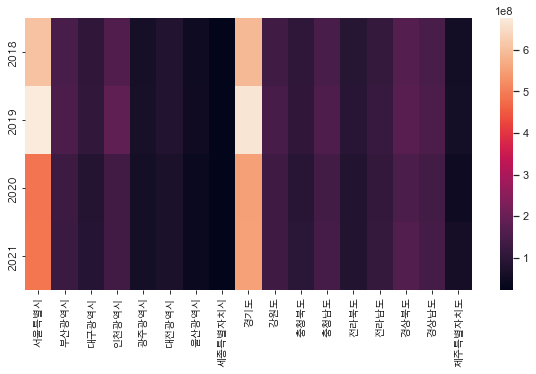

In [30]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(10,5))
plt.xticks(rotation = -45)
sns.set_theme(style='whitegrid')
sns.heatmap(data = df_total_visit.transpose())

## 문제점
---
> 서울특별시와 경기도만 연간 방문자 최대 6억명으로 값이 너무 튐.

> 시각화를 위해 값의 조정이 필요하다고 판단

> 기초지자체가 겹치는 이름이 확인됨. e.g. 중구 

### 멀티인덱스 생성
> 기초지자체는 광역지자체에 소속되어 있으므로 2차원 멀티 인덱싱

In [31]:
list_index = df_total_visit.index.tolist()
list_col = df_total_visit.columns.tolist()

In [32]:
# 2차원 멀티 인덱스 리스트 생성
mul_index = [
    [],
    []
]
for ind in list_index:
    for col in list_col:
        mul_index[0].append(ind)
        mul_index[1].append(col)

In [33]:
test1 = pd.concat([df_total_visit.iloc[i] for i in range(len(df_total_visit))])

> 막대그래프를 그리기 위해 모든 벨류 1행으로 압축

In [34]:
test2 = pd.DataFrame(data = test1.values.tolist(), index = mul_index).transpose()
test2

서울특별시                                               부산광역시  \
          2018         2019         2020         2021         2018   
0 606282720.00 676239448.00 486063680.00 487463395.00 149628499.00   

                                                대구광역시               ...  \
          2019         2020         2021         2018         2019  ...   
0 154956548.00 125355958.00 124393966.00 105117110.00 107487542.00  ...   

          경상북도                      경상남도                            \
          2020         2021         2018         2019         2020   
0 152858211.00 161590338.00 148321065.00 153464716.00 139633588.00   

                   제주특별자치도                                      
          2021        2018        2019        2020        2021  
0 140785495.00 54982027.00 58816696.00 46601527.00 59563739.00  

[1 rows x 68 columns]

<AxesSubplot:>

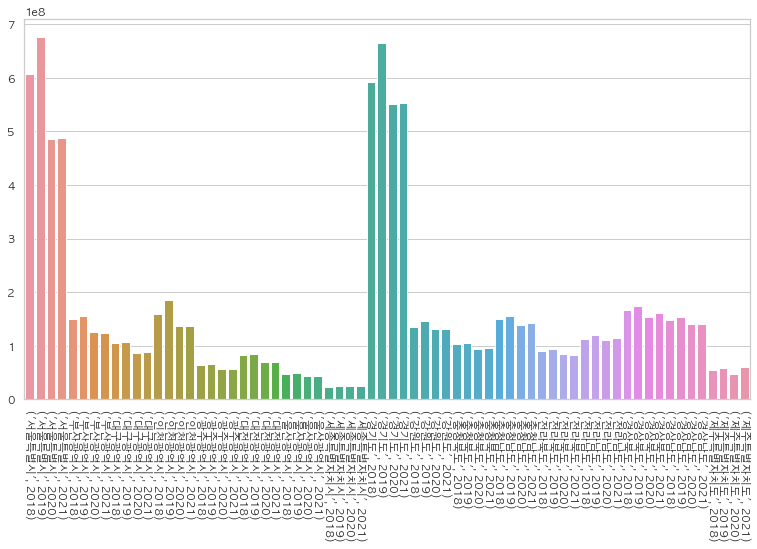

In [215]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(13,7))
plt.xticks(rotation = -90)
sns.set_theme(style='whitegrid')
sns.barplot(data = test2)

> 실제로 서울과 경기도 값이 많이 튀는 것을 확인

> 비율로 변환

In [36]:
df_total_visit

,2018,2019,2020,2021
서울특별시,606282720.00,676239448.00,486063680.00,487463395.00
부산광역시,149628499.00,154956548.00,125355958.00,124393966.00
대구광역시,105117110.00,107487542.00,86338895.00,87781593.00
인천광역시,159550161.00,186061142.00,137306507.00,136489732.00
광주광역시,63837307.00,66038784.00,56689650.00,56320473.00
대전광역시,82585850.00,83628100.00,69557253.00,69189201.00
울산광역시,46433222.00,48862667.00,43482816.00,43034413.00
세종특별자치시,23109587.00,25285404.00,23948388.00,25413200.00
경기도,591259444.00,664749407.00,550763372.00,552531290.00
강원도,135219733.00,145612023.00,131296509.00,130321244.00


### 년도 별 방문자 추이 비율
> (기준년 방문자 - 전년도 방문자) / 전년도 방문자

In [420]:
#년도 별 방문자 추이 비율
rate_19 = (df_2019_heatmap['방문자 수'] - df_2019_heatmap['전년도 방문자 수'])/df_2019_heatmap['전년도 방문자 수']*100 
rate_20 = (df_2020_heatmap['방문자 수'] - df_2020_heatmap['전년도 방문자 수'])/df_2020_heatmap['전년도 방문자 수']*100
rate_21 = (df_2021_heatmap['방문자 수'] - df_2021_heatmap['전년도 방문자 수'])/df_2021_heatmap['전년도 방문자 수']*100

In [421]:
df_total_transition_rate = pd.DataFrame(#index=df_2018_heatmap.광역지자체,
                                       data={'rate_19':rate_19,
                                             'rate_20':rate_20,
                                             'rate_21':rate_21})
df_total_transition_rate.set_index(df_2018_heatmap['광역지자체'], inplace=True)
df_total_transition_rate

,rate_19,rate_20,rate_21
광역지자체,,,
서울특별시,11.54,-28.12,0.29
부산광역시,3.56,-19.10,-0.77
대구광역시,2.26,-19.68,1.67
인천광역시,16.62,-26.20,-0.59
광주광역시,3.45,-14.16,-0.65
대전광역시,1.26,-16.83,-0.53
울산광역시,5.23,-11.01,-1.03
세종특별자치시,9.42,-5.29,6.12
경기도,12.43,-17.15,0.32


> 각 년도 시즌별 방문자 추이율 밀도 확인

<AxesSubplot:title={'center':'방문자 추이 밀도'}, ylabel='Density'>

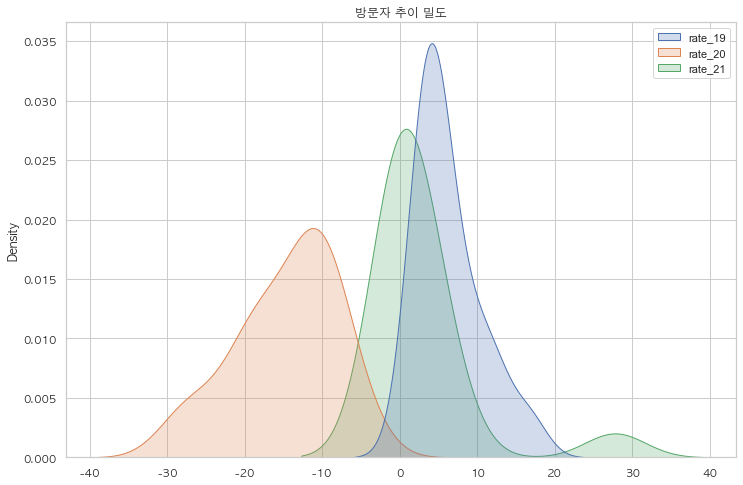

In [425]:
# 증감 비율 시즌별 밀도 그래프
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12,8))
# plt.xticks(rotation = -45,)
# plt.xlim(-1,1)
plt.title('방문자 추이 밀도')
sns.set_theme(style='whitegrid')
sns.kdeplot(data = df_total_transition_rate, shade = True)

> 19년도에서 20년도는 코로나로 인해 값 밀도가 음수에 몰려있음.

> 20년도에서 21년도는 코로나 방역지침 완화로 비율 값이 양수에 높은 밀도로 몰려있음.

### 멀티인덱싱 수정
---
> 위에서 했던 멀티인덱싱은 pandas MultiIndex 객체로 정의하지 않아서 각 인덱스 level별로 접근이 어려움 (차원별로 접근이 어려움) 

In [40]:
test3 = pd.DataFrame(df_2018_visit.set_index(['광역지자체명','기초지자체명'])['기초지자체 방문자 수'])
test3

기초지자체 방문자 수
광역지자체명 기초지자체명              
강원도    고성군       9902786.00
       춘천시      26684111.00
       원주시      29707426.00
       강릉시      31662185.00
       동해시      10110320.00
...                     ...
충청북도   단양군       8282963.00
       청주시 상당구  29496991.00
       청주시 서원구  31070361.00
       청주시 흥덕구  33534409.00
       청주시 청원구  25047208.00

[250 rows x 1 columns]

In [426]:
list1 = df_2018_visit['광역지자체명'].values.tolist()

In [427]:
list2 = df_2018_visit['기초지자체명'].values.tolist()

#### 멀티 인덱싱을 위해 리스트안에서 튜플로 2차원 인덱스 생성

In [43]:
# 멀티 인덱스 만들기 준비, 리스트 안에 튜플로 감싸야함
tuples = list(zip(list1, list2))
tuples

[('강원도', '고성군'),
 ('강원도', '춘천시'),
 ('강원도', '원주시'),
 ('강원도', '강릉시'),
 ('강원도', '동해시'),
 ('강원도', '태백시'),
 ('강원도', '속초시'),
 ('강원도', '삼척시'),
 ('강원도', '홍천군'),
 ('강원도', '횡성군'),
 ('강원도', '영월군'),
 ('강원도', '평창군'),
 ('강원도', '정선군'),
 ('강원도', '철원군'),
 ('강원도', '화천군'),
 ('강원도', '양구군'),
 ('강원도', '인제군'),
 ('강원도', '양양군'),
 ('경기도', '고양시 덕양구'),
 ('경기도', '고양시 일산동구'),
 ('경기도', '고양시 일산서구'),
 ('경기도', '성남시 수정구'),
 ('경기도', '성남시 중원구'),
 ('경기도', '성남시 분당구'),
 ('경기도', '수원시 장안구'),
 ('경기도', '수원시 권선구'),
 ('경기도', '수원시 팔달구'),
 ('경기도', '수원시 영통구'),
 ('경기도', '안산시 상록구'),
 ('경기도', '의정부시'),
 ('경기도', '안산시 단원구'),
 ('경기도', '안양시 만안구'),
 ('경기도', '부천시'),
 ('경기도', '광명시'),
 ('경기도', '평택시'),
 ('경기도', '동두천시'),
 ('경기도', '안양시 동안구'),
 ('경기도', '용인시 처인구'),
 ('경기도', '용인시 기흥구'),
 ('경기도', '용인시 수지구'),
 ('경기도', '과천시'),
 ('경기도', '구리시'),
 ('경기도', '남양주시'),
 ('경기도', '오산시'),
 ('경기도', '시흥시'),
 ('경기도', '군포시'),
 ('경기도', '의왕시'),
 ('경기도', '하남시'),
 ('경기도', '파주시'),
 ('경기도', '이천시'),
 ('경기도', '안성시'),
 ('경기도', '김포시'),
 ('경기도', '화성시'),
 ('경기도', '광주시'),
 ('경기도', 

#### pandas 멀티인덱스 객체 선언 및 레벨 정의

In [177]:
# 멀티 인덱스, 인덱스 레벨 선언
index = pd.MultiIndex.from_tuples(tuples, names=["광역지자체명", "기초지자체명"])
index

MultiIndex([( '강원도',     '고성군'),
            ( '강원도',     '춘천시'),
            ( '강원도',     '원주시'),
            ( '강원도',     '강릉시'),
            ( '강원도',     '동해시'),
            ( '강원도',     '태백시'),
            ( '강원도',     '속초시'),
            ( '강원도',     '삼척시'),
            ( '강원도',     '홍천군'),
            ( '강원도',     '횡성군'),
            ...
            ('충청북도',     '영동군'),
            ('충청북도',     '증평군'),
            ('충청북도',     '진천군'),
            ('충청북도',     '괴산군'),
            ('충청북도',     '음성군'),
            ('충청북도',     '단양군'),
            ('충청북도', '청주시 상당구'),
            ('충청북도', '청주시 서원구'),
            ('충청북도', '청주시 흥덕구'),
            ('충청북도', '청주시 청원구')],
           names=['광역지자체명', '기초지자체명'], length=250)

In [58]:
regional_18 = pd.DataFrame(data = df_2018_visit['기초지자체 방문자 수'].values, index = index)
regional_18.rename(columns={0:'18년도 기초지자체 방문자 수'}, inplace = True)
regional_18

18년도 기초지자체 방문자 수
광역지자체명 기초지자체명                   
강원도    고성군            9902786.00
       춘천시           26684111.00
       원주시           29707426.00
       강릉시           31662185.00
       동해시           10110320.00
...                          ...
충청북도   단양군            8282963.00
       청주시 상당구       29496991.00
       청주시 서원구       31070361.00
       청주시 흥덕구       33534409.00
       청주시 청원구       25047208.00

[250 rows x 1 columns]

In [59]:
regional_19 = pd.DataFrame(data = df_2019_visit['기초지자체 방문자 수'].values, index = index)
regional_19.rename(columns={0:'19년도 기초지자체 방문자 수'}, inplace = True)
regional_19

19년도 기초지자체 방문자 수
광역지자체명 기초지자체명                   
강원도    고성군           10550924.00
       춘천시           30513697.00
       원주시           30608425.00
       강릉시           32299061.00
       동해시           10790192.00
...                          ...
충청북도   단양군            8466913.00
       청주시 상당구       30030642.00
       청주시 서원구       31083847.00
       청주시 흥덕구       33777215.00
       청주시 청원구       26170669.00

[250 rows x 1 columns]

In [60]:
regional_20 = pd.DataFrame(data = df_2020_visit['기초지자체 방문자 수'].values, index = index)
regional_20.rename(columns={0:'20년도 기초지자체 방문자 수'}, inplace = True)
regional_20

20년도 기초지자체 방문자 수
광역지자체명 기초지자체명                   
강원도    고성군           11015058.00
       춘천시           26796235.00
       원주시           27394299.00
       강릉시           31234595.00
       동해시           10308451.00
...                          ...
충청북도   단양군            6764180.00
       청주시 상당구       27714992.00
       청주시 서원구       27654706.00
       청주시 흥덕구       30482701.00
       청주시 청원구       22630232.00

[250 rows x 1 columns]

In [61]:
regional_21 = pd.DataFrame(data = df_2021_visit['기초지자체 방문자 수'].values, index = index)
regional_21.rename(columns={0:'21년도 기초지자체 방문자 수'}, inplace = True)
regional_21

21년도 기초지자체 방문자 수
광역지자체명 기초지자체명                   
강원도    고성군           11562375.00
       춘천시           26862501.00
       원주시           27186987.00
       강릉시           30454953.00
       동해시            9936522.00
...                          ...
충청북도   단양군            7269015.00
       청주시 상당구       27990075.00
       청주시 서원구       27378586.00
       청주시 흥덕구       32269781.00
       청주시 청원구       23174665.00

[250 rows x 1 columns]

### 멀티인덱싱한 데이터프레임 생성

In [63]:
df_regional_1821 = pd.concat([regional_18,regional_19,regional_20,regional_21], axis = 1)
df_regional_1821

18년도 기초지자체 방문자 수  19년도 기초지자체 방문자 수  20년도 기초지자체 방문자 수  \
광역지자체명 기초지자체명                                                          
강원도    고성군            9902786.00       10550924.00       11015058.00   
       춘천시           26684111.00       30513697.00       26796235.00   
       원주시           29707426.00       30608425.00       27394299.00   
       강릉시           31662185.00       32299061.00       31234595.00   
       동해시           10110320.00       10790192.00       10308451.00   
...                          ...               ...               ...   
충청북도   단양군            8282963.00        8466913.00        6764180.00   
       청주시 상당구       29496991.00       30030642.00       27714992.00   
       청주시 서원구       31070361.00       31083847.00       27654706.00   
       청주시 흥덕구       33534409.00       33777215.00       30482701.00   
       청주시 청원구       25047208.00       26170669.00       22630232.00   

                21년도 기초지자체 방문자 수  
광역지자체명 기초지자체명                     
강원도    고성군           11562375.00  
       춘천시           26862501.00  
       원주시           27186987.00  
       강릉시           30454953.00  
       동해시            9936522.00  
...                          ...  
충청북도   단양군            7269015.00  
       청주시 상당구       27990075.00  
       청주시 서원구       27378586.00  
       청주시 흥덕구       32269781.00  
       청주시 청원구       23174665.00  

[250 rows x 4 columns]

In [428]:
# concating_df1 = 
concating_18_19 = pd.DataFrame((df_regional_1821['19년도 기초지자체 방문자 수'] - df_regional_1821['18년도 기초지자체 방문자 수'])/df_regional_1821['18년도 기초지자체 방문자 수']).rename(columns = {0:'18-19rate'}) *100
concating_18_19

18-19rate
광역지자체명 기초지자체명            
강원도    고성군           6.55
       춘천시          14.35
       원주시           3.03
       강릉시           2.01
       동해시           6.72
...                   ...
충청북도   단양군           2.22
       청주시 상당구       1.81
       청주시 서원구       0.04
       청주시 흥덕구       0.72
       청주시 청원구       4.49

[250 rows x 1 columns]

In [429]:
concating_19_20 = pd.DataFrame((df_regional_1821['20년도 기초지자체 방문자 수'] - df_regional_1821['19년도 기초지자체 방문자 수'])/df_regional_1821['19년도 기초지자체 방문자 수']).rename(columns = {0:'19-20rate'})*100
concating_19_20

19-20rate
광역지자체명 기초지자체명            
강원도    고성군           4.40
       춘천시         -12.18
       원주시         -10.50
       강릉시          -3.30
       동해시          -4.46
...                   ...
충청북도   단양군         -20.11
       청주시 상당구      -7.71
       청주시 서원구     -11.03
       청주시 흥덕구      -9.75
       청주시 청원구     -13.53

[250 rows x 1 columns]

In [430]:
concating_20_21 = pd.DataFrame((df_regional_1821['21년도 기초지자체 방문자 수'] - df_regional_1821['20년도 기초지자체 방문자 수'])/df_regional_1821['20년도 기초지자체 방문자 수']).rename(columns = {0:'20-21rate'})*100
concating_20_21

20-21rate
광역지자체명 기초지자체명            
강원도    고성군           4.97
       춘천시           0.25
       원주시          -0.76
       강릉시          -2.50
       동해시          -3.61
...                   ...
충청북도   단양군           7.46
       청주시 상당구       0.99
       청주시 서원구      -1.00
       청주시 흥덕구       5.86
       청주시 청원구       2.41

[250 rows x 1 columns]

In [431]:
df_18_21_rate = pd.concat([concating_18_19,concating_19_20,concating_20_21], axis = 1)
df_18_21_rate.rename(columns={0:'18-19rate',1:'19-20rate',2:'20-21rate'}, inplace = True)

### 멀티인덱싱된 연도별 방문자 추이율 데이터프레임 생성

In [432]:
# 기초지자체명 방문자 수 추이율
df_18_21_rate

18-19rate  19-20rate  20-21rate
광역지자체명 기초지자체명                                  
강원도    고성군           6.55       4.40       4.97
       춘천시          14.35     -12.18       0.25
       원주시           3.03     -10.50      -0.76
       강릉시           2.01      -3.30      -2.50
       동해시           6.72      -4.46      -3.61
...                   ...        ...        ...
충청북도   단양군           2.22     -20.11       7.46
       청주시 상당구       1.81      -7.71       0.99
       청주시 서원구       0.04     -11.03      -1.00
       청주시 흥덕구       0.72      -9.75       5.86
       청주시 청원구       4.49     -13.53       2.41

[250 rows x 3 columns]

## 연도별 방문자 수 추이율 증가 Top10
---

### 2018-2019

In [307]:
# 18-19 방문자 수 추이율 증가 top10
df_18_21_rate.sort_values(by = '18-19rate', ascending = False).head(10)

18-19rate  19-20rate  20-21rate
광역지자체명 기초지자체명                                 
인천광역시  미추홀구       569.26     -18.17      -0.57
전라남도   신안군         37.32     -11.09      15.05
전라북도   임실군         29.34      -0.55      14.30
강원도    화천군         28.63     -13.50      -0.90
       양구군         21.85     -19.83       4.46
인천광역시  중구          21.67     -38.29      -4.01
       서구          20.44      -9.43      -1.57
강원도    철원군         20.40      -9.47       3.54
경기도    하남시         20.38       6.07       6.09
전라남도   진도군         20.29       0.42       5.40

### 2019-2020

In [308]:
# 19-20(코로나 사태) 방문자 수 추이율 증가 top10
df_18_21_rate.sort_values(by = '19-20rate', ascending = False).head(10)

18-19rate  19-20rate  20-21rate
광역지자체명 기초지자체명                                 
강원도    양양군          4.37       9.93      -5.66
경상남도   밀양시          6.80       6.69       9.21
전라남도   고흥군          4.38       6.29       8.50
경기도    하남시         20.38       6.07       6.09
       연천군         17.60       5.33       5.77
부산광역시  기장군          2.93       5.03       0.91
인천광역시  옹진군         12.54       4.95      -3.96
부산광역시  북구           9.81       4.75      -0.85
경상북도   고령군          5.02       4.69       8.12
경기도    구리시          3.47       4.41       4.30

### 2020-2021

In [309]:
# 20-21(코로나 완하) 방문자 수 추이율 증가 top10
df_18_21_rate.sort_values(by = '20-21rate', ascending = False).head(10)

18-19rate  19-20rate  20-21rate
광역지자체명  기초지자체명                                 
제주특별자치도 서귀포시         3.40     -20.58      33.49
        제주시          4.64     -20.38      27.09
경상북도    울릉군         12.66     -31.68      22.26
광주광역시   동구          -4.41     -24.83      18.55
전라남도    구례군          3.22     -18.11      17.36
경상북도    청도군          3.87      -8.42      16.36
서울특별시   강서구          7.58     -10.41      15.19
전라남도    신안군         37.32     -11.09      15.05
광주광역시   서구          -2.08     -17.90      14.47
전라북도    임실군         29.34      -0.55      14.30

## 시각화

In [310]:
# 18-19 top5
df_18_19_rate_5 = df_18_21_rate.sort_values(by = '18-19rate', ascending = False).head(5)
# 19-20 top5
df_19_20_rate_5 = df_18_21_rate.sort_values(by = '19-20rate', ascending = False).head(5)
# 20-21 top5
df_20_21_rate_5 = df_18_21_rate.sort_values(by = '20-21rate', ascending = False).head(5)

In [415]:
df_20_21_rate_5

18-19rate  19-20rate  20-21rate
광역지자체명  기초지자체명                                 
제주특별자치도 서귀포시         3.40     -20.58      33.49
        제주시          4.64     -20.38      27.09
경상북도    울릉군         12.66     -31.68      22.26
광주광역시   동구          -4.41     -24.83      18.55
전라남도    구례군          3.22     -18.11      17.36

In [417]:
df_18_19_rate_5['18-19rate'].transpose().unstack(level = 0)

광역지자체명,인천광역시,전라남도,전라북도,강원도
기초지자체명,,,,
미추홀구,569.26,NaN,NaN,NaN
신안군,NaN,37.32,NaN,NaN
임실군,NaN,NaN,29.34,NaN
화천군,NaN,NaN,NaN,28.63
양구군,NaN,NaN,NaN,21.85


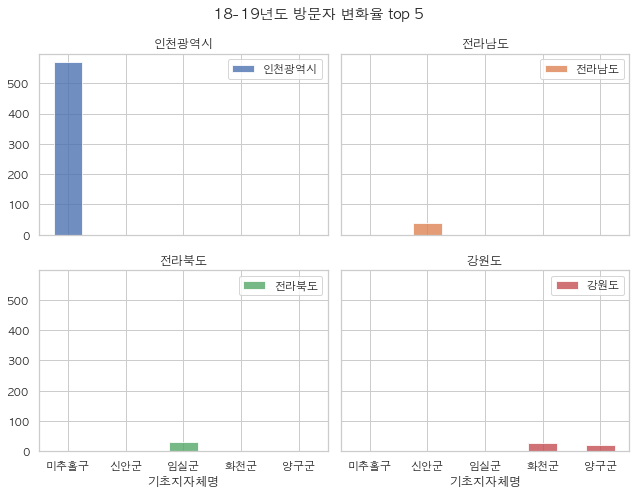

In [312]:
# 18-21 방문자 변화율 top5
plt.rcParams['axes.unicode_minus'] = False # - 부호 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic' # 한글 깨짐 방지
df_18_19_rate_5['18-19rate'].transpose().unstack(level=0).plot(kind = 'bar',subplots = True, sharey = True, figsize = (9,7), title = '18-19년도 방문자 변화율 top 5', layout = (2,2), alpha = 0.8, rot = 0)
plt.tight_layout()

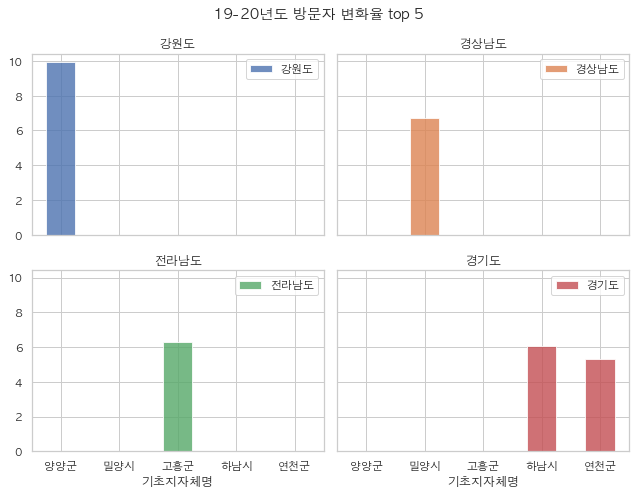

In [313]:
df_19_20_rate_5['19-20rate'].transpose().unstack(level=0).plot(kind = 'bar',subplots = True, sharey = True, figsize = (9,7), title = '19-20년도 방문자 변화율 top 5', layout = (2,2), alpha = 0.8, rot = 0)
plt.tight_layout()

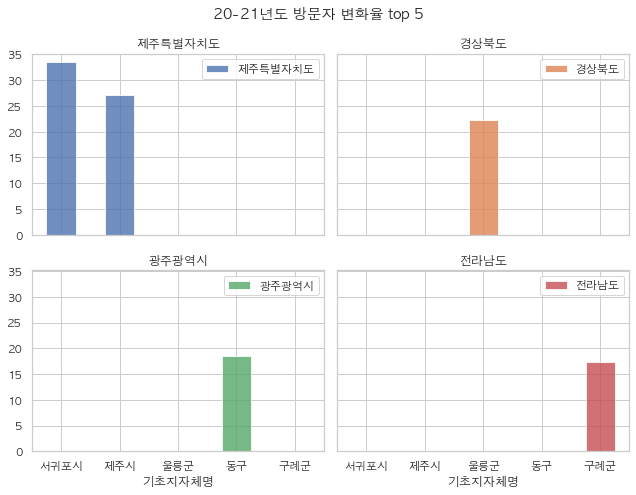

In [314]:
df_20_21_rate_5['20-21rate'].transpose().unstack(level=0).plot(kind = 'bar',subplots = True, sharey = True, figsize = (9,7), title = '20-21년도 방문자 변화율 top 5', layout = (2,2), alpha = 0.8, rot = 0)
plt.tight_layout()

### 시각화 리뷰

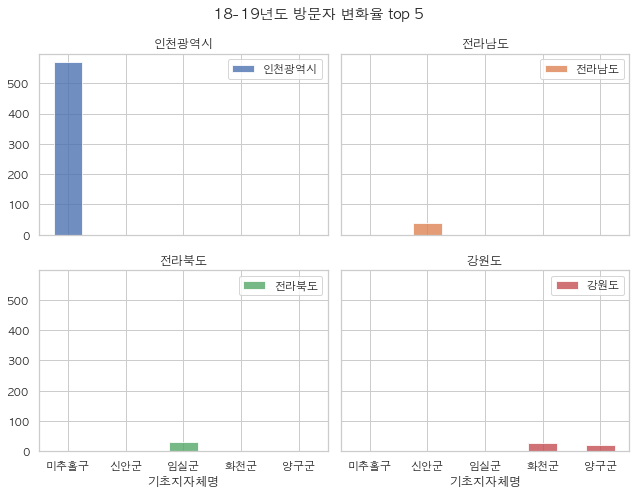

In [315]:
df_18_19_rate_5['18-19rate'].transpose().unstack(level=0).plot(kind = 'bar',subplots = True, sharey = True, figsize = (9,7), title = '18-19년도 방문자 변화율 top 5', layout = (2,2), alpha = 0.8, rot = 0)
plt.tight_layout()

|광역지자체|기초지자체|
|:---|:---|
|인천광역시|미추홀구|
|전라남도|신안군|
|전라북도|임실군|
|강원도|화천군|
||양구군|


> 미추홀구 값이 많이 튐

In [316]:
outlier = pd.read_csv('data/20220703134356_미추홀구_201901-201912_데이터랩_다운로드/20220703134356_방문자 수 추이.csv', encoding = 'cp949')
outlier

,기준년월,기초지자체,방문자 구분,방문자 수,전년도 방문자 수
0,201901,미추홀구,현지인방문자(a),5080652.00,0.00
1,201901,미추홀구,외지인방문자(b),3485884.00,0.00
2,201901,미추홀구,외국인방문자(c),13834.00,0.00
3,201901,미추홀구,외부방문자(b+c),3499719.00,0.00
4,201901,미추홀구,전체방문자(a+b+c),8580371.00,0.00
5,201902,미추홀구,현지인방문자(a),4336062.00,0.00
6,201902,미추홀구,외지인방문자(b),3237020.00,0.00
7,201902,미추홀구,외국인방문자(c),14799.00,0.00
8,201902,미추홀구,외부방문자(b+c),3251819.00,0.00
9,201902,미추홀구,전체방문자(a+b+c),7587882.00,0.00


In [317]:
outlier = outlier[outlier['방문자 구분'] == '외부방문자(b+c)'].loc[:,['기준년월', '방문자 수']].set_index('기준년월')

In [318]:
outlier

,방문자 수
기준년월,
201901,3499719.00
201902,3251819.00
201903,4296207.00
201904,3595411.00
201905,4119625.00
201906,3979757.00
201907,4097230.00
201908,4418543.00
201909,4472741.00


> 미추홀구는 2018년 일별, 월별 데이터를 수집하지 않아 2019년만을 이용해 분석

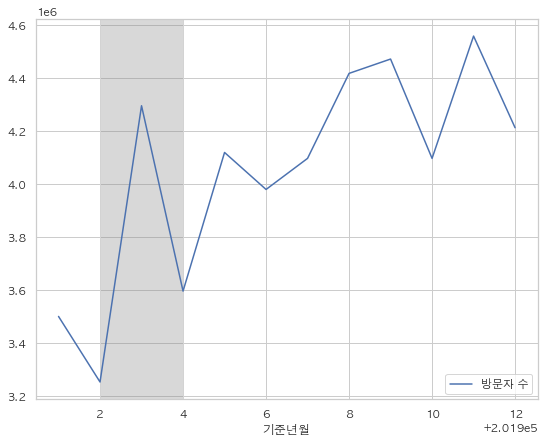

In [319]:
plt.figure(figsize=(9,7))
sns.lineplot(data = outlier)
plt.axvspan(201902, 201904, facecolor = 'gray', alpha = 0.3)

> 3월에 값 변화가 가장 큼, 3월을 제외하면 꾸준히 우상향

> 2019년 또한 일별 데이터를 제공하지 않음

> 추측 1) 미추홀 구 수봉공원의 벚꽃 축제 일정

<img src = "./img/수봉공원.jpeg" width = '600' height = '400' >

> 추측 2) 미추홀구 학익동 식자재마트 확재 (3월)

<img src = "./img/인천식자재마트화재.jpeg" width = '600' height = '400' >

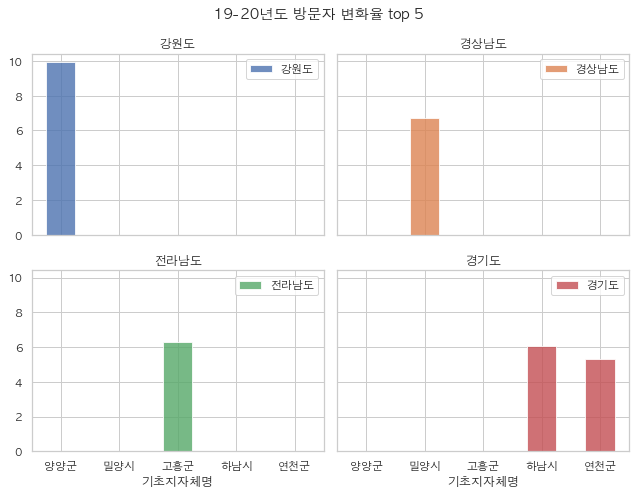

In [463]:
plt.rcParams['font.family'] = 'AppleGothic'
df_19_20_rate_5['19-20rate'].transpose().unstack(level=0).plot(kind = 'bar',subplots = True, sharey = True, figsize = (9,7), title = '19-20년도 방문자 변화율 top 5', layout = (2,2), alpha = 0.8, rot = 0)
plt.tight_layout()

In [465]:
df_19_20_rate_5

18-19rate  19-20rate  20-21rate
광역지자체명 기초지자체명                                 
강원도    양양군          4.37       9.93      -5.66
경상남도   밀양시          6.80       6.69       9.21
전라남도   고흥군          4.38       6.29       8.50
경기도    하남시         20.38       6.07       6.09
       연천군         17.60       5.33       5.77

In [468]:
df_2019_regional_expenditure[df_2019_regional_expenditure['기초지자체 명'] == '양양군']

,광역지자체 명,기초지자체 명,광역지자체 지출액,광역지자체 지출액 비율,기초지자체 지출액,기초지자체 지출액 비율
6,강원도,양양군,1217194404.00,3.00,43082190652.00,3.50


In [469]:
df_2020_regional_expenditure[df_2020_regional_expenditure['기초지자체 명'] == '양양군']

,광역지자체 명,기초지자체 명,광역지자체 지출액,광역지자체 지출액 비율,기초지자체 지출액,기초지자체 지출액 비율
6,강원도,양양군,1087017848.00,3.30,48394176595.00,4.50


,광역지자체 명,기초지자체 명,광역지자체 지출액,광역지자체 지출액 비율,기초지자체 지출액,기초지자체 지출액 비율
0,강원도,강릉시,1217194404.00,3.00,201201119408.00,16.50
1,강원도,고성군,1217194404.00,3.00,38341613539.00,3.10
2,강원도,동해시,1217194404.00,3.00,44992471953.00,3.70
3,강원도,삼척시,1217194404.00,3.00,54497983706.00,4.50
4,강원도,속초시,1217194404.00,3.00,157375392770.00,12.90
...,...,...,...,...,...,...
245,충청북도,청주시 상당구,1008055447.00,2.50,126352845984.00,12.50
246,충청북도,청주시 서원구,1008055447.00,2.50,128966681702.00,12.80
247,충청북도,청주시 청원구,1008055447.00,2.50,130367586907.00,12.90
248,충청북도,청주시 흥덕구,1008055447.00,2.50,226786552208.00,22.50


## 코로나 시기에 방문자 증가

In [320]:
df1 = df_18_21_rate.sort_values(by = '19-20rate', ascending = False).head(5).transpose()
df1

광역지자체명      강원도 경상남도 전라남도   경기도      
기초지자체명      양양군  밀양시  고흥군   하남시   연천군
18-19rate  4.37 6.80 4.38 20.38 17.60
19-20rate  9.93 6.69 6.29  6.07  5.33
20-21rate -5.66 9.21 8.50  6.09  5.77

<AxesSubplot:title={'center':'양양군, 밀양시, 고흥군, 하남시, 연천군의 18-21 추이율 그래프'}>

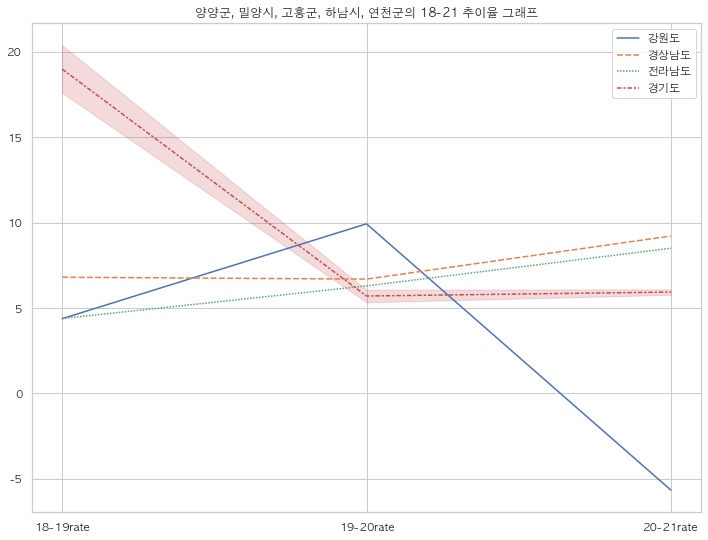

In [403]:
plt.figure(figsize=(12,9))
plt.rcParams['font.family'] = 'AppleGothic'
plt.title('양양군, 밀양시, 고흥군, 하남시, 연천군의 18-21 추이율 그래프')
sns.lineplot(data = df1)

> 강원도 양양군만 A 형 그래프를 보임.

In [519]:
search_10_2019 = pd.read_csv('data/20220705000156_양양군_201901-201912_데이터랩_다운로드/20220705000156_검색 목적지 상위10.csv',encoding = 'cp949')
search_10_2019 = search_10_2019.set_index('검색 목적지명')
search_10_2019 = (search_10_2019['검색량'] - search_10_2019['검색량(전년도)'])/search_10_2019['검색량(전년도)']*100

In [518]:
search_10_2020 = pd.read_csv('data/20220705001122_양양군_202001-202012_데이터랩_다운로드/20220705001122_검색 목적지 상위10.csv', encoding='cp949')
search_10_2020 = search_10_2020.set_index('검색 목적지명')
search_10_2020 = (search_10_2020['검색량'] - search_10_2020['검색량(전년도)'])/search_10_2020['검색량(전년도)']*100

In [521]:
search_10_2021 = pd.read_csv('data/20220705001234_양양군_202101-202112_데이터랩_다운로드/20220705001234_검색 목적지 상위10.csv', encoding='cp949')
search_10_2021 = search_10_2021.set_index('검색 목적지명')
search_10_2021 = (search_10_2021['검색량'] - search_10_2021['검색량(전년도)'])/search_10_2021['검색량(전년도)']*100

In [524]:
df2 = pd.concat([search_10_2019,search_10_2020,search_10_2021], axis = 1).rename(columns = {0:'18-19rate',1:'19-20rate',2:'20-21rate'})

> 강원도 양양군 네비게이션(티맵) 검색 순위 연도별 추이

<AxesSubplot:>

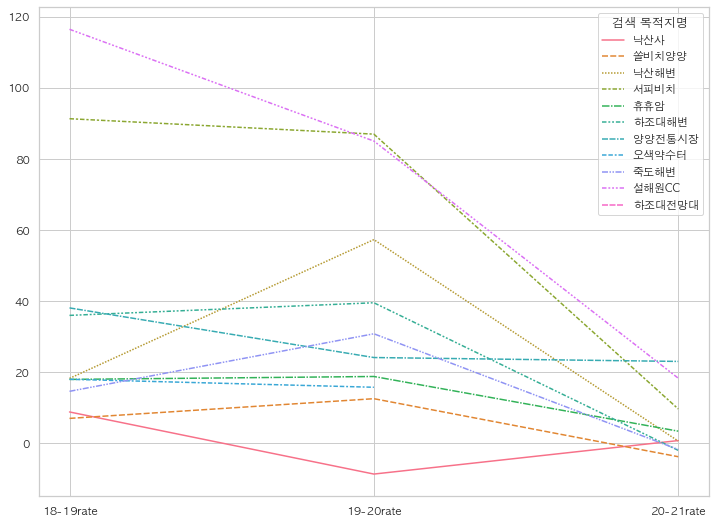

In [628]:
plt.figure(figsize=(12,9))
plt.rcParams['font.family'] = 'AppleGothic'
# plt.title('양양군, 밀양시, 고흥군, 하남시, 연천군의 18-21 추이율 그래프')
sns.lineplot(data = df2.transpose())

In [579]:
a

검색량
기준연월   목적지 유형       
201901 기타관광     1069
       숙박      23072
       음식      13876
       자연관광    17619
       쇼핑       1926
...              ...
201904 쇼핑       1801
       문화관광     2355
       역사관광    15758
       체험관광      246
       레저스포츠    3747

[108 rows x 1 columns]

In [625]:
pd.read_csv('data/20220705000156_양양군_201901-201912_데이터랩_다운로드/20220705000156_목적지 유형별 검색량.csv',encoding='cp949').set_index(['기준연월', '목적지 유형'])

검색량
기준연월   목적지 유형       
201901 기타관광     1069
       숙박      23072
       음식      13876
       자연관광    17619
       쇼핑       1926
...              ...
201904 쇼핑       1801
       문화관광     2355
       역사관광    15758
       체험관광      246
       레저스포츠    3747

[108 rows x 1 columns]

array([<AxesSubplot:title={'center':'(검색량, 기타관광)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 레저스포츠)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 문화관광)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 쇼핑)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 숙박)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 역사관광)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 음식)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 자연관광)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 체험관광)'}, xlabel='기준연월'>],
      dtype=object)

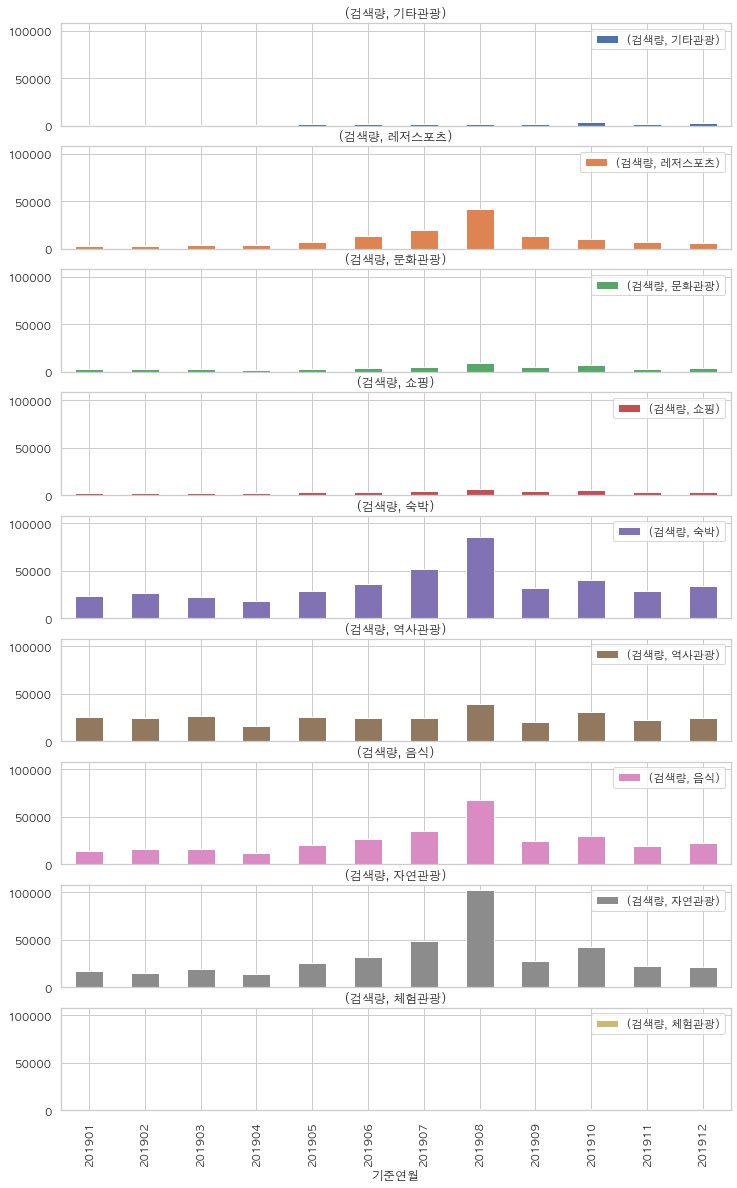

In [622]:
pd.read_csv('data/20220705000156_양양군_201901-201912_데이터랩_다운로드/20220705000156_목적지 유형별 검색량.csv',encoding='cp949').set_index(['기준연월', '목적지 유형']).unstack(level=1).plot(kind = 'bar', subplots = True, figsize = (12,20), sharey = True, sharex=True)

array([<AxesSubplot:title={'center':'(검색량, 기타관광)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 레저스포츠)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 문화관광)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 쇼핑)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 숙박)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 역사관광)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 음식)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 자연관광)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 체험관광)'}, xlabel='기준연월'>],
      dtype=object)

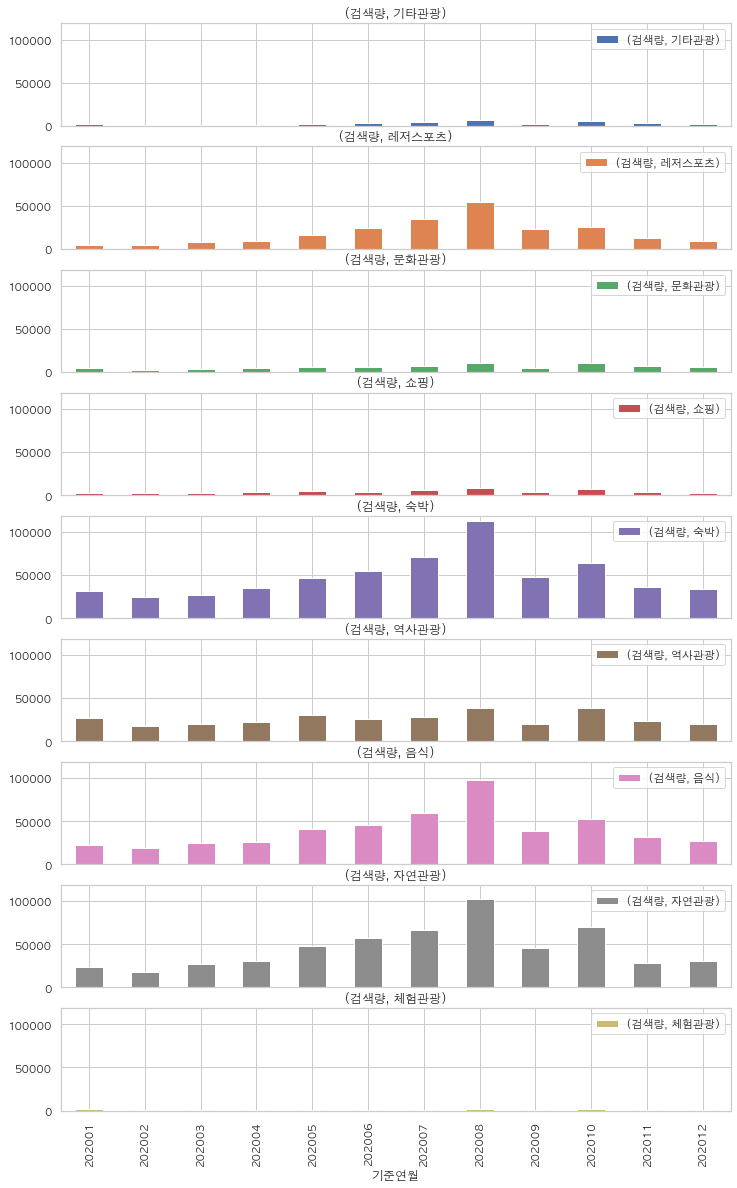

In [623]:
pd.read_csv('data/20220705001122_양양군_202001-202012_데이터랩_다운로드/20220705001122_목적지 유형별 검색량.csv',encoding='cp949').set_index(['기준연월', '목적지 유형']).unstack(level=1).plot(kind = 'bar', subplots = True, figsize = (12,20), sharey = True, sharex=True)

array([<AxesSubplot:title={'center':'(검색량, 기타관광)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 레저스포츠)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 문화관광)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 쇼핑)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 숙박)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 역사관광)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 음식)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 자연관광)'}, xlabel='기준연월'>,
       <AxesSubplot:title={'center':'(검색량, 체험관광)'}, xlabel='기준연월'>],
      dtype=object)

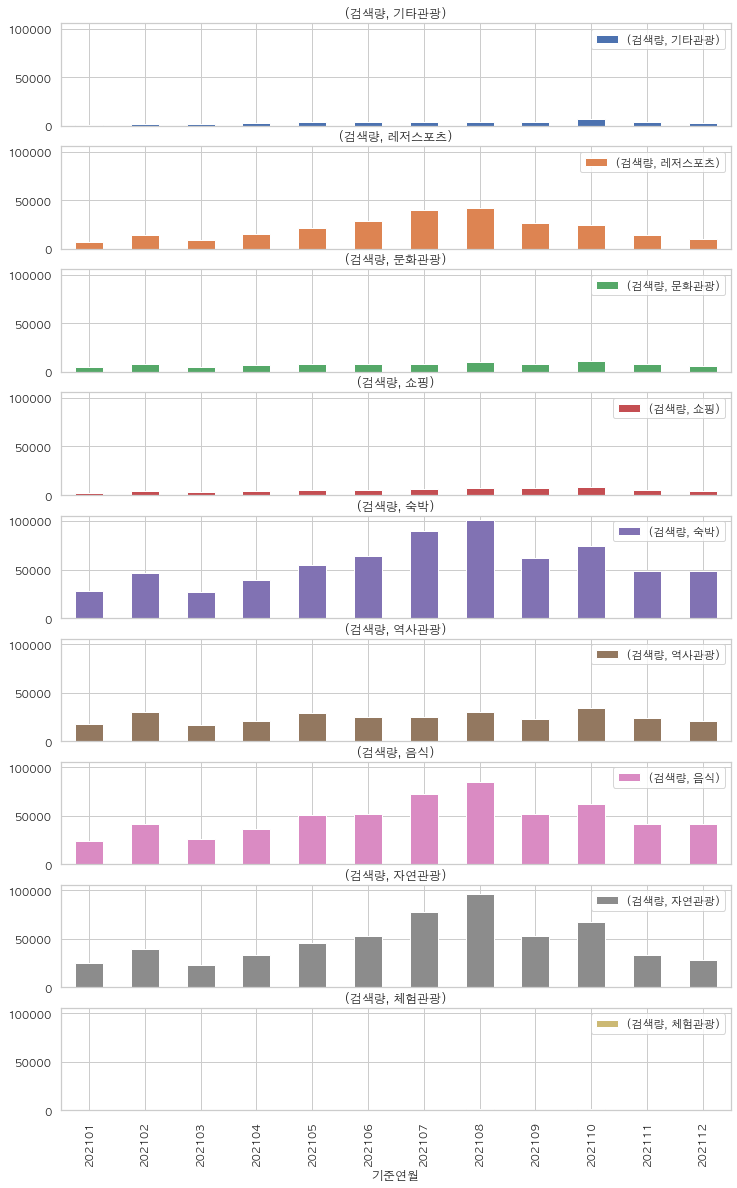

In [624]:
pd.read_csv('data/20220705001234_양양군_202101-202112_데이터랩_다운로드/20220705001234_목적지 유형별 검색량.csv',encoding='cp949').set_index(['기준연월', '목적지 유형']).unstack(level=1).plot(kind = 'bar', subplots = True, figsize = (12,20), sharey = True, sharex=True)

> 모든 구간에서 여름에 방문하는 것으로 추정

> 코로나 이후로 숙박에 관한 검색이 증가

> 검색어 중 서핑, 해변 급등, 검색어 분류 중 숙박과 레저스포츠 증가를 근거로 코로나 이후 양양군의 기존 강점인 해변과 관련 사항들이 증가한 것으로 보임

In [632]:
pd.read_csv('data/20220705000156_양양군_201901-201912_데이터랩_다운로드/20220705000156_업종별 신용카드 소비.csv', encoding='cp949')

,업종대분류명,업종중분류명,중분류 소비액
0,쇼핑업,면세점,30576430.00
1,쇼핑업,관광기념품,676818630.00
2,쇼핑업,레저용품쇼핑,633599188.00
3,쇼핑업,대형쇼핑몰,12461000.00
4,숙박업,콘도,7152824695.00
5,숙박업,기타숙박,3428857621.00
6,숙박업,캠핑장/펜션,82240061.00
7,숙박업,호텔,32266990.00
8,식음료업,식음료,25885344938.00
9,여가서비스업,골프장,4605675116.00


In [633]:
pd.read_csv('data/20220705001122_양양군_202001-202012_데이터랩_다운로드/20220705001122_업종별 신용카드 소비.csv', encoding = 'cp949')

,업종대분류명,업종중분류명,중분류 소비액
0,쇼핑업,면세점,9018870.00
1,쇼핑업,관광기념품,623661550.00
2,쇼핑업,레저용품쇼핑,707934370.00
3,쇼핑업,대형쇼핑몰,13029050.00
4,숙박업,콘도,5902466903.00
5,숙박업,캠핑장/펜션,173236128.00
6,숙박업,기타숙박,3576281507.00
7,숙박업,호텔,42476025.00
8,식음료업,식음료,29567676759.00
9,여가서비스업,골프장,7009191035.00


In [ ]:
pd

In [483]:
pd.read_csv('data/20220705000156_양양군_201901-201912_데이터랩_다운로드/20220705000156_관광진단 지표 현황(순위).csv', encoding = 'cp949')

,지표명,지표 순위값
0,방문자유입,87
1,숙박방문자 비율,113
2,체류시간,93
3,활동성,194
4,소비성,81


In [484]:
pd.read_csv('data/20220705000156_양양군_201901-201912_데이터랩_다운로드/20220705000156_관광진단 지표 현황(전년동기대비).csv', encoding='cp949')

,지표명,지표 증감률
0,방문자유입,4.40
1,숙박방문자 비율,-3.50
2,체류시간,4.80
3,활동성,26.00
4,소비성,8.90


In [486]:
pd.read_csv('data/20220705000156_양양군_201901-201912_데이터랩_다운로드/20220705000156_목적지 유형별 검색량.csv', encoding='cp949')

,기준연월,목적지 유형,검색량
0,201901,기타관광,1069
1,201901,숙박,23072
2,201901,음식,13876
3,201901,자연관광,17619
4,201901,쇼핑,1926
...,...,...,...
103,201904,쇼핑,1801
104,201904,문화관광,2355
105,201904,역사관광,15758
106,201904,체험관광,246


In [475]:
pd.read_csv('data/20220704231521_강원도_201901-201912_데이터랩_다운로드/20220704231521_관광소비 추이.csv', encoding='cp949')

,기준년월,광역지자체,중분류,지출액,전년도 지출액
0,201901,강원도,총소비,95967578.00,93716707.00
1,201901,강원도,호텔,4202995.00,3749902.00
2,201901,강원도,콘도,9083866.00,12770383.00
3,201901,강원도,캠핑장/펜션,62609.00,60263.00
4,201901,강원도,기타숙박,5069995.00,4067593.00
...,...,...,...,...,...
235,201912,강원도,골프장,3958411.00,3450819.00
236,201912,강원도,스키장,1267869.00,1535965.00
237,201912,강원도,기타레저,454220.00,1168656.00
238,201912,강원도,문화서비스,1810168.00,1863731.00


In [478]:
pd.read_csv('data/20220704231521_강원도_201901-201912_데이터랩_다운로드/20220704231521_업종별 지출액.csv', encoding='cp949')

,대분류,중분류,대분류 지출액,대분류 지출액 비율,중분류 지출액,중분류 지출액 비율
0,쇼핑업,관광기념품,191101753.00,15.70,3724972.00,1.90
1,쇼핑업,대형쇼핑몰,191101753.00,15.70,90298317.00,47.30
2,쇼핑업,레저용품쇼핑,191101753.00,15.70,96967113.00,50.70
3,쇼핑업,면세점,191101753.00,15.70,111350.00,0.10
4,숙박업,기타숙박,182544435.00,15.00,63631796.00,34.90
5,숙박업,캠핑장/펜션,182544435.00,15.00,979620.00,0.50
6,숙박업,콘도,182544435.00,15.00,81222765.00,44.50
7,숙박업,호텔,182544435.00,15.00,36710254.00,20.10
8,식음료업,식음료,673832322.00,55.40,673832322.00,100.00
9,여가서비스업,골프장,164743910.00,13.50,118837986.00,72.10


In [479]:
pd.read_csv('data/20220704231521_강원도_201901-201912_데이터랩_다운로드/20220704231521_지역별 지출액.csv', encoding='cp949')

,기초지자체 명,기초지자체 지출액,기초지자체 지출액 비율
0,강릉시,201201119.00,16.50
1,고성군,38341614.00,3.10
2,동해시,44992472.00,3.70
3,삼척시,54497984.00,4.50
4,속초시,157375393.00,12.90
5,양구군,8130963.00,0.70
6,양양군,43082191.00,3.50
7,영월군,13328166.00,1.10
8,원주시,164570978.00,13.50
9,인제군,24485204.00,2.00


In [437]:
df_2019_regional_expenditure[df_2019_regional_expenditure['광역지자체 명'] == '강원도']

,광역지자체 명,기초지자체 명,광역지자체 지출액,광역지자체 지출액 비율,기초지자체 지출액,기초지자체 지출액 비율
0,강원도,강릉시,1217194404.00,3.00,201201119408.00,16.50
1,강원도,고성군,1217194404.00,3.00,38341613539.00,3.10
2,강원도,동해시,1217194404.00,3.00,44992471953.00,3.70
3,강원도,삼척시,1217194404.00,3.00,54497983706.00,4.50
4,강원도,속초시,1217194404.00,3.00,157375392770.00,12.90
5,강원도,양구군,1217194404.00,3.00,8130963473.00,0.70
6,강원도,양양군,1217194404.00,3.00,43082190652.00,3.50
7,강원도,영월군,1217194404.00,3.00,13328165703.00,1.10
8,강원도,원주시,1217194404.00,3.00,164570978460.00,13.50
9,강원도,인제군,1217194404.00,3.00,24485203871.00,2.00


In [450]:
pd.read_csv('data/20220704212509_강원도_2019-2020_데이터랩_다운로드/20220704212509_관광소비 추이.csv', encoding = 'cp949')

,기준년월,광역지자체,중분류,지출액,전년도 지출액
0,2019,강원도,총소비,1217194404.00,1205190494.00
1,2019,강원도,호텔,36710254.00,32149401.00
2,2019,강원도,콘도,81222765.00,96491815.00
3,2019,강원도,캠핑장/펜션,979620.00,971433.00
4,2019,강원도,기타숙박,63631796.00,59249201.00
5,2019,강원도,여행업,3512082.00,3074890.00
6,2019,강원도,육상운송,383866.00,343852.00
7,2019,강원도,수상운송,348257.00,377162.00
8,2019,강원도,항공운송,62208.00,5498.00
9,2019,강원도,렌터카,665573.00,762851.00


In [453]:
pd.read_csv('data/20220704212509_강원도_2019-2020_데이터랩_다운로드/20220704212509_업종별 지출액.csv', encoding = 'cp949')

,대분류,중분류,대분류 지출액,대분류 지출액 비율,중분류 지출액,중분류 지출액 비율
0,쇼핑업,관광기념품,355853415.00,15.40,6595174.00,1.90
1,쇼핑업,대형쇼핑몰,355853415.00,15.40,170310121.00,47.90
2,쇼핑업,레저용품쇼핑,355853415.00,15.40,178774265.00,50.20
3,쇼핑업,면세점,355853415.00,15.40,173854.00,0.00
4,숙박업,기타숙박,332994284.00,14.50,117614101.00,35.30
5,숙박업,캠핑장/펜션,332994284.00,14.50,2585284.00,0.80
6,숙박업,콘도,332994284.00,14.50,146702045.00,44.10
7,숙박업,호텔,332994284.00,14.50,66092853.00,19.80
8,식음료업,식음료,1278955054.00,55.50,1278955054.00,100.00
9,여가서비스업,골프장,328860666.00,14.30,259415345.00,78.90


In [455]:
pd.read_csv('data/20220704212509_강원도_2019-2020_데이터랩_다운로드/20220704212509_지역별 지출액.csv', encoding = 'cp949')

,기초지자체 명,기초지자체 지출액,기초지자체 지출액 비율
0,강릉시,385835051.00,16.70
1,고성군,79766727.00,3.50
2,동해시,85691318.00,3.70
3,삼척시,102991057.00,4.50
4,속초시,305443180.00,13.30
5,양구군,13549712.00,0.60
6,양양군,91476367.00,4.00
7,영월군,25560235.00,1.10
8,원주시,296915614.00,12.90
9,인제군,43861427.00,1.90


In [460]:
df_2019_regional_expenditure[df_2019_regional_expenditure['광역지자체 명'] == '강원도']

,광역지자체 명,기초지자체 명,광역지자체 지출액,광역지자체 지출액 비율,기초지자체 지출액,기초지자체 지출액 비율
0,강원도,강릉시,1217194404.00,3.00,201201119408.00,16.50
1,강원도,고성군,1217194404.00,3.00,38341613539.00,3.10
2,강원도,동해시,1217194404.00,3.00,44992471953.00,3.70
3,강원도,삼척시,1217194404.00,3.00,54497983706.00,4.50
4,강원도,속초시,1217194404.00,3.00,157375392770.00,12.90
5,강원도,양구군,1217194404.00,3.00,8130963473.00,0.70
6,강원도,양양군,1217194404.00,3.00,43082190652.00,3.50
7,강원도,영월군,1217194404.00,3.00,13328165703.00,1.10
8,강원도,원주시,1217194404.00,3.00,164570978460.00,13.50
9,강원도,인제군,1217194404.00,3.00,24485203871.00,2.00


In [461]:
df_2018_regional_expenditure[df_2018_regional_expenditure['광역지자체 명'] == '강원도']

,광역지자체 명,기초지자체 명,광역지자체 지출액,광역지자체 지출액 비율,기초지자체 지출액,기초지자체 지출액 비율
0,강원도,강릉시,1205190494.00,2.90,190565501207.00,15.80
1,강원도,고성군,1205190494.00,2.90,36200840226.00,3.00
2,강원도,동해시,1205190494.00,2.90,47129092528.00,3.90
3,강원도,삼척시,1205190494.00,2.90,55153171766.00,4.60
4,강원도,속초시,1205190494.00,2.90,156518250845.00,13.00
5,강원도,양구군,1205190494.00,2.90,8468910036.00,0.70
6,강원도,양양군,1205190494.00,2.90,39559800674.00,3.30
7,강원도,영월군,1205190494.00,2.90,13015649386.00,1.10
8,강원도,원주시,1205190494.00,2.90,172226306463.00,14.30
9,강원도,인제군,1205190494.00,2.90,22888433243.00,1.90


잠만 검색건수도 중요한 지표 아닌가? 오히려 단순 방문자 수보다 중요한데? 비용발생도 중요하잖아 최소한 가중치 같거나, 더 줘야할듯

> 네비게이션 검색결과

In [322]:
concat1 = pd.DataFrame(data = df_2018_regional_search['기초지자체 검색건수'].values, index = index).rename(columns = {0:'18년 검색건수'})

In [323]:
concat2 = pd.DataFrame(data = df_2019_regional_search['기초지자체 검색건수'].values, index = index).rename(columns = {0:'19년 검색건수'})

In [324]:
concat3 = pd.DataFrame(data = df_2020_regional_search['기초지자체 검색건수'].values, index = index).rename(columns = {0:'20년 검색건수'})

In [325]:
concat4 = pd.DataFrame(data = df_2021_regional_search['기초지자체 검색건수'].values, index = index).rename(columns = {0:'21년 검색건수'})

In [326]:
concated_df = pd.concat([concat1, concat2, concat3, concat4], axis = 1)
concated_df

18년 검색건수  19년 검색건수  20년 검색건수  21년 검색건수
광역지자체명 기초지자체명                                         
강원도    고성군       3662531   4581271   5564821   5975321
       춘천시       1094461   1373749   1975200   2296186
       원주시        446976    571034    705406    822340
       강릉시        951701   1081557   1233719   1403918
       동해시       3148510   3798515   4535130   4747665
...                  ...       ...       ...       ...
충청북도   단양군        592792    814873    897554   1106009
       청주시 상당구    350475    529420    545422    678045
       청주시 서원구    696637   1029824   1053884   1326390
       청주시 흥덕구    644980    909762   1014890   1254231
       청주시 청원구    924043   1277731   1516363   2035830

[250 rows x 4 columns]

In [328]:
con1 = pd.DataFrame((concated_df['19년 검색건수']-concated_df['18년 검색건수'])/concated_df['18년 검색건수']*100).rename(columns = {0:'18-19년도 검색건수 추이율'})

In [329]:
con2 = pd.DataFrame((concated_df['20년 검색건수']-concated_df['19년 검색건수'])/concated_df['19년 검색건수']*100).rename(columns = {0:'19-20년도 검색건수 추이율'})

In [330]:
con3 = pd.DataFrame((concated_df['21년 검색건수']-concated_df['20년 검색건수'])/concated_df['20년 검색건수']*100).rename(columns = {0:'20-21년도 검색건수 추이율'})

In [331]:
df_1821_search_rate = pd.concat([con1,con2,con3], axis = 1)
df_1821_search_rate

18-19년도 검색건수 추이율  19-20년도 검색건수 추이율  20-21년도 검색건수 추이율
광역지자체명 기초지자체명                                                       
강원도    고성군                 25.08             21.47              7.38
       춘천시                 25.52             43.78             16.25
       원주시                 27.75             23.53             16.58
       강릉시                 13.64             14.07             13.80
       동해시                 20.64             19.39              4.69
...                          ...               ...               ...
충청북도   단양군                 37.46             10.15             23.22
       청주시 상당구             51.06              3.02             24.32
       청주시 서원구             47.83              2.34             25.86
       청주시 흥덕구             41.05             11.56             23.58
       청주시 청원구             38.28             18.68             34.26

[250 rows x 3 columns]

In [332]:
df_1821_search_rate[df_1821_search_rate['19-20년도 검색건수 추이율'] < 0].sort_values(by = '19-20년도 검색건수 추이율')

,,18-19년도 검색건수 추이율,19-20년도 검색건수 추이율,20-21년도 검색건수 추이율
광역지자체명,기초지자체명,,,
강원도,영월군,24.76,-38.49,24.30
경기도,성남시 수정구,32.44,-23.71,27.29
부산광역시,서구,34.74,-23.36,3.56
인천광역시,중구,52.63,-20.58,11.10
서울특별시,강동구,25.03,-19.48,18.75
경기도,성남시 중원구,28.78,-16.25,39.94
대구광역시,중구,28.68,-15.29,38.85
서울특별시,서초구,15.49,-14.57,28.26
충청남도,청양군,103.63,-12.47,14.16


네비게이션 이용이 자체가 늘어서 검색건수가 전국적으로 증가하는 추세와 겹치면서 인사이트 찾기가 어려움.

> 관광소비

In [364]:
df_2019_consum_heatmap.set_index('광역지자체')

,소비액,전년동기 소비액,전년대비 소비증감률
광역지자체,,,
서울특별시,12651878804.00,12815890953.00,-1.30
부산광역시,3231025903.00,3344017630.00,-3.40
대구광역시,1771314960.00,1811689196.00,-2.20
인천광역시,2163958916.00,2277657721.00,-5.00
광주광역시,987219413.00,990044775.00,-0.30
대전광역시,1342966520.00,1372071467.00,-2.10
울산광역시,589507791.00,615420466.00,-4.20
세종특별자치시,96428595.00,92641757.00,4.10
경기도,9027829686.00,8890262647.00,1.50


In [442]:
con1 = (df_2019_consum_heatmap['소비액']-df_2019_consum_heatmap['전년동기 소비액'])/df_2019_consum_heatmap['전년동기 소비액']*100

In [443]:
con2 = (df_2020_consum_heatmap['소비액']-df_2020_consum_heatmap['전년동기 소비액'])/df_2020_consum_heatmap['전년동기 소비액']*100

In [444]:
con3 = (df_2021_consum_heatmap['소비액']-df_2021_consum_heatmap['전년동기 소비액'])/df_2021_consum_heatmap['전년동기 소비액']*100

In [445]:
df_1821_cunsum_rate = pd.concat([con1,con2,con3], axis =1)

In [446]:
df_1821_cunsum_rate = df_1821_cunsum_rate.set_index(df_2019_consum_heatmap.set_index('광역지자체').index)

In [447]:
df_1821_cunsum_rate = df_1821_cunsum_rate.rename(columns = {0:'18-19 소비 추이율', 1:'19-20 소비 추이율', 2:'20-21 소비 추이율'})

In [448]:
df_1821_cunsum_rate

,18-19 소비 추이율,19-20 소비 추이율,20-21 소비 추이율
광역지자체,,,
서울특별시,-1.28,-26.53,-1.62
부산광역시,-3.38,-22.52,-3.22
대구광역시,-2.23,-22.24,4.47
인천광역시,-4.99,-30.87,-8.03
광주광역시,-0.29,-18.11,2.04
대전광역시,-2.12,-28.28,1.44
울산광역시,-4.21,-17.19,-5.12
세종특별자치시,4.09,-8.69,3.03
경기도,1.55,-12.89,1.22


In [626]:
df_1821_cunsum_rate.transpose()

광역지자체,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
18-19 소비 추이율,-1.28,-3.38,-2.23,-4.99,-0.29,-2.12,-4.21,4.09,1.55,1.00,-0.41,-1.38,-1.91,4.86,-1.95,-2.60,1.49
19-20 소비 추이율,-26.53,-22.52,-22.24,-30.87,-18.11,-28.28,-17.19,-8.69,-12.89,-10.69,-12.22,-15.56,-16.96,-7.58,-15.94,-13.19,-14.16
20-21 소비 추이율,-1.62,-3.22,4.47,-8.03,2.04,1.44,-5.12,3.03,1.22,2.96,2.27,2.70,2.61,3.09,8.35,-1.75,27.59


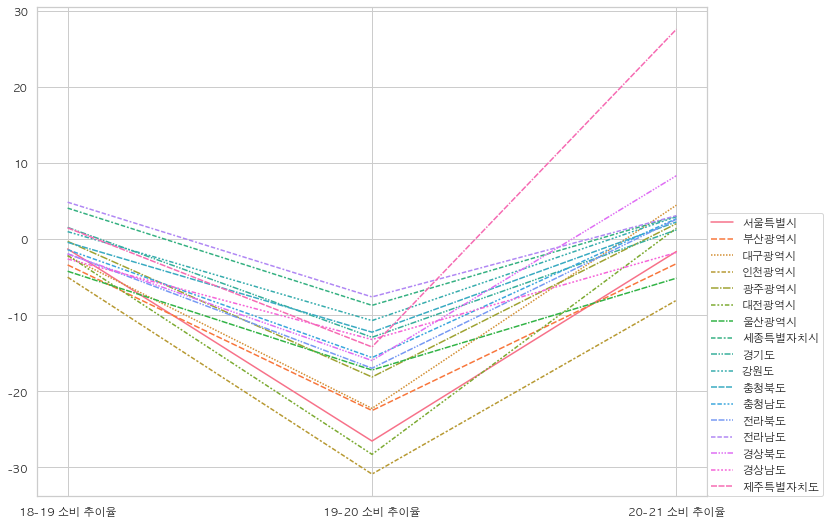

In [627]:
plt.figure(figsize=(12,9))
sns.lineplot(data = df_1821_cunsum_rate.transpose())
plt.legend(loc = (1.0,0))

> 전체 지역 V자 형 그래프

> 제주특별자치도 : 급상승

In [413]:
df_2019_consum_heatmap

,광역지자체,소비액,전년동기 소비액,전년대비 소비증감률
0,서울특별시,12651878804.00,12815890953.00,-1.30
1,부산광역시,3231025903.00,3344017630.00,-3.40
2,대구광역시,1771314960.00,1811689196.00,-2.20
3,인천광역시,2163958916.00,2277657721.00,-5.00
4,광주광역시,987219413.00,990044775.00,-0.30
5,대전광역시,1342966520.00,1372071467.00,-2.10
6,울산광역시,589507791.00,615420466.00,-4.20
7,세종특별자치시,96428595.00,92641757.00,4.10
8,경기도,9027829686.00,8890262647.00,1.50
9,강원도,1217194404.00,1205190494.00,1.00


In [ ]:
df_2019

In [334]:
df_2019_consum_transition

,기준년월,광역지자체,대분류,지출액,전년도 지출액
0,2019,전국,총소비,40691625874.00,41076033230.00
1,2019,전국,호텔,523308018.00,491787945.00
2,2019,전국,콘도,196978690.00,205035360.00
3,2019,전국,캠핑장/펜션,4879110.00,4382556.00
4,2019,전국,기타숙박,822871407.00,854327421.00
5,2019,전국,여행업,192964640.00,218445190.00
6,2019,전국,육상운송,933012102.00,955744628.00
7,2019,전국,수상운송,66855378.00,63180185.00
8,2019,전국,항공운송,679509730.00,692416903.00
9,2019,전국,렌터카,67407644.00,56694515.00


In [335]:
df_2019_industrial_expenditure

,대분류,중분류,대분류 지출액,대분류 지출액 비율,중분류 지출액,중분류 지출액 비율
0,쇼핑업,관광기념품,12779584069.00,31.40,72632366.00,0.60
1,쇼핑업,대형쇼핑몰,12779584069.00,31.40,9728964103.00,76.10
2,쇼핑업,레저용품쇼핑,12779584069.00,31.40,2290048613.00,17.90
3,쇼핑업,면세점,12779584069.00,31.40,687938988.00,5.40
4,숙박업,기타숙박,1548037225.00,3.80,822871407.00,53.20
5,숙박업,캠핑장/펜션,1548037225.00,3.80,4879110.00,0.30
6,숙박업,콘도,1548037225.00,3.80,196978690.00,12.70
7,숙박업,호텔,1548037225.00,3.80,523308018.00,33.80
8,식음료업,식음료,21641442299.00,53.20,21641442299.00,100.00
9,여가서비스업,골프장,2782812788.00,6.80,1448687196.00,52.10


In [336]:
df_2019_regional_expenditure

,광역지자체 명,기초지자체 명,광역지자체 지출액,광역지자체 지출액 비율,기초지자체 지출액,기초지자체 지출액 비율
0,강원도,강릉시,1217194404.00,3.00,201201119408.00,16.50
1,강원도,고성군,1217194404.00,3.00,38341613539.00,3.10
2,강원도,동해시,1217194404.00,3.00,44992471953.00,3.70
3,강원도,삼척시,1217194404.00,3.00,54497983706.00,4.50
4,강원도,속초시,1217194404.00,3.00,157375392770.00,12.90
...,...,...,...,...,...,...
245,충청북도,청주시 상당구,1008055447.00,2.50,126352845984.00,12.50
246,충청북도,청주시 서원구,1008055447.00,2.50,128966681702.00,12.80
247,충청북도,청주시 청원구,1008055447.00,2.50,130367586907.00,12.90
248,충청북도,청주시 흥덕구,1008055447.00,2.50,226786552208.00,22.50


In [634]:
df_2018_industrial_expenditure.set_index('대분류')['중분류 지출액']

대분류
쇼핑업         67686627.00
쇼핑업      10058041902.00
쇼핑업       2520958865.00
쇼핑업        712317323.00
숙박업        854327421.00
숙박업          4382556.00
숙박업        205035360.00
숙박업        491787945.00
식음료업     21593337884.00
여가서비스업    1299557625.00
여가서비스업     101185222.00
여가서비스업     625030824.00
여가서비스업     535003349.00
여가서비스업      20898397.00
여가서비스업           507.00
여행업        218445190.00
운송업         56694515.00
운송업         63180185.00
운송업        955744628.00
운송업        692416903.00
Name: 중분류 지출액, dtype: float64

In [635]:
df_2019_industrial_expenditure.set_index('대분류')['중분류 지출액']

대분류
쇼핑업         72632366.00
쇼핑업       9728964103.00
쇼핑업       2290048613.00
쇼핑업        687938988.00
숙박업        822871407.00
숙박업          4879110.00
숙박업        196978690.00
숙박업        523308018.00
식음료업     21641442299.00
여가서비스업    1448687196.00
여가서비스업     110348899.00
여가서비스업     625161038.00
여가서비스업     577819599.00
여가서비스업      20795688.00
여가서비스업           368.00
여행업        192964640.00
운송업         67407644.00
운송업         66855378.00
운송업        933012102.00
운송업        679509730.00
Name: 중분류 지출액, dtype: float64

In [636]:
df_2020_industrial_expenditure.set_index('대분류')['중분류 지출액']

대분류
쇼핑업         51314802.00
쇼핑업       8455684093.00
쇼핑업       2035264399.00
쇼핑업        230098354.00
숙박업        636359014.00
숙박업          8522049.00
숙박업        156508172.00
숙박업        372998730.00
식음료업     17533846879.00
여가서비스업    1663742200.00
여가서비스업      73622741.00
여가서비스업     227489898.00
여가서비스업     218338049.00
여가서비스업      12096561.00
여가서비스업             0.00
여행업         38990229.00
운송업         74313312.00
운송업         47473723.00
운송업        507447357.00
운송업        190639752.00
Name: 중분류 지출액, dtype: float64

In [637]:
df_2021_industrial_expenditure.set_index('대분류')['중분류 지출액']

대분류
쇼핑업         68317049.00
쇼핑업       9070338231.00
쇼핑업       2039043502.00
쇼핑업        242849135.00
숙박업        665639297.00
숙박업          9401921.00
숙박업        188365100.00
숙박업        443033597.00
식음료업     16587818731.00
여가서비스업    1985027748.00
여가서비스업      97354293.00
여가서비스업     214610969.00
여가서비스업     263574642.00
여가서비스업       8593866.00
여행업         23909263.00
운송업         94820191.00
운송업         53705098.00
운송업        509736724.00
운송업        191193055.00
Name: 중분류 지출액, dtype: float64

In [638]:
df_2018_regional_search

,광역지자체,기초지자체,광역지자체 검색건수,광역지자체 검색건수 비율,기초지자체 검색건수,기초지자체 검색건수 비율
0,강원도,강릉시,19205254,9.00,3662531,19.10
1,강원도,고성군,19205254,9.00,1094461,5.70
2,강원도,동해시,19205254,9.00,446976,2.30
3,강원도,삼척시,19205254,9.00,951701,5.00
4,강원도,속초시,19205254,9.00,3148510,16.40
...,...,...,...,...,...,...
245,충청북도,청주시 상당구,5714367,2.70,592792,10.40
246,충청북도,청주시 서원구,5714367,2.70,350475,6.10
247,충청북도,청주시 청원구,5714367,2.70,696637,12.20
248,충청북도,청주시 흥덕구,5714367,2.70,644980,11.30


In [645]:
df_2018_search_type.sort_values(by = '유형별 검색건수', ascending = False )

,티맵카테고리중분류명,유형별 검색건수,유형별 검색건수 비율
6,음식,75907850,35.60
3,문화관광,33896722,15.90
7,숙박,25979085,12.20
5,쇼핑,25684044,12.00
0,자연관광,16751410,7.90
4,레저스포츠,13064751,6.10
8,기타관광,11973036,5.60
1,역사관광,8263751,3.90
2,체험관광,1785636,0.80


In [646]:
df_2019_search_type.sort_values(by = '유형별 검색건수', ascending = False )

,티맵카테고리중분류명,유형별 검색건수,유형별 검색건수 비율
6,음식,110039686,38.10
3,문화관광,43884465,15.20
7,숙박,34939190,12.10
5,쇼핑,34323033,11.90
0,자연관광,20103620,7.00
4,레저스포츠,16845622,5.80
8,기타관광,16141513,5.60
1,역사관광,10684810,3.70
2,체험관광,2111053,0.70


In [647]:
df_2020_search_type.sort_values(by = '유형별 검색건수', ascending = False )

,티맵카테고리중분류명,유형별 검색건수,유형별 검색건수 비율
6,음식,129905507,41.10
5,쇼핑,39570345,12.50
7,숙박,37032287,11.70
3,문화관광,36074219,11.40
0,자연관광,25864691,8.20
4,레저스포츠,20092407,6.40
8,기타관광,14692148,4.60
1,역사관광,11306070,3.60
2,체험관광,1596908,0.50


In [648]:
df_2021_search_type.sort_values(by = '유형별 검색건수', ascending = False )

,티맵카테고리중분류명,유형별 검색건수,유형별 검색건수 비율
6,음식,158659552,41.40
5,쇼핑,47306705,12.30
7,숙박,46012890,12.00
3,문화관광,45517868,11.90
0,자연관광,29093741,7.60
4,레저스포츠,24220347,6.30
8,기타관광,17569147,4.60
1,역사관광,13415946,3.50
2,체험관광,1643912,0.40


> 20년도 이후로 문화관광과 쇼핑 순위가 바뀐 것 외에는 특이점없음

In [651]:
df_2019_regional_search_transition

,기준년월,광역지자체,티맵카테고리중분류명,광역지자체 검색건수,광역지자체 전년도 검색건수
0,2019,전국,전체,289072992,213306220
1,2019,전국,자연관광,20103620,16751407
2,2019,전국,역사관광,10684810,8263745
3,2019,전국,체험관광,2111053,1785621
4,2019,전국,문화관광,43884465,33896703
5,2019,전국,레저스포츠,16845622,13064741
6,2019,전국,쇼핑,34323033,25684032
7,2019,전국,음식,110039686,75907850
8,2019,전국,숙박,34939190,25979085
9,2019,전국,기타관광,16141513,11973036


In [652]:
df_2020_regional_search_transition

,기준년월,광역지자체,티맵카테고리중분류명,광역지자체 검색건수,광역지자체 전년도 검색건수
0,2020,전국,전체,316134582,289072868
1,2020,전국,자연관광,25864691,20103620
2,2020,전국,역사관광,11306070,10684806
3,2020,전국,체험관광,1596908,2111028
4,2020,전국,문화관광,36074219,43884450
5,2020,전국,레저스포츠,20092407,16845594
6,2020,전국,쇼핑,39570345,34323023
7,2020,전국,음식,129905507,110039666
8,2020,전국,숙박,37032287,34939168
9,2020,전국,기타관광,14692148,16141513


In [653]:
df_2021_regional_search_transition

,기준년월,광역지자체,티맵카테고리중분류명,광역지자체 검색건수,광역지자체 전년도 검색건수
0,2021,전국,전체,383440108,316134433
1,2021,전국,자연관광,29093741,25864665
2,2021,전국,역사관광,13415946,11306064
3,2021,전국,체험관광,1643912,1596908
4,2021,전국,문화관광,45517868,36074181
5,2021,전국,레저스포츠,24220347,20092343
6,2021,전국,쇼핑,47306705,39570333
7,2021,전국,음식,158659552,129905507
8,2021,전국,숙박,46012890,37032284
9,2021,전국,기타관광,17569147,14692148


In [655]:
df_2018_regional_search

,광역지자체,기초지자체,광역지자체 검색건수,광역지자체 검색건수 비율,기초지자체 검색건수,기초지자체 검색건수 비율
0,강원도,강릉시,19205254,9.00,3662531,19.10
1,강원도,고성군,19205254,9.00,1094461,5.70
2,강원도,동해시,19205254,9.00,446976,2.30
3,강원도,삼척시,19205254,9.00,951701,5.00
4,강원도,속초시,19205254,9.00,3148510,16.40
...,...,...,...,...,...,...
245,충청북도,청주시 상당구,5714367,2.70,592792,10.40
246,충청북도,청주시 서원구,5714367,2.70,350475,6.10
247,충청북도,청주시 청원구,5714367,2.70,696637,12.20
248,충청북도,청주시 흥덕구,5714367,2.70,644980,11.30


In [657]:
import time

In [550]:
#공공데이터활용지원센터_보건복지부 코로나19 감염 현황
# 2020, 2021, 2022



url ='http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson'
key = 'suCRrNjscrjE+O8K90jEKvai41x0TWioUg6A5yZSSnTz1DeWKjqj/k4tg1a/BDsFQaKPPnZXGBp9kz1nLHI79Q=='


merged_df = pd.DataFrame([])
for year in range(2020, 2022+1):
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5) + round(np.random.random(),2)
    time.sleep(a)
    params = {
        'ServiceKey': key,
        'pageNo': 1,
        'numOfRows':10,
        'startCreateDt': str(year)+ '0101',	
        'endCreateDt':  str(year) + '1231'
    }
    res = requests.get(url, params =params)
    soup = BeautifulSoup(res.text, 'xml')
    date = []
    decideCnt = []
    for item in soup.findAll('item'):
        date.append(item.find('stateDt').get_text())
        decideCnt.append(item.find('decideCnt').get_text())
    pd1 = pd.DataFrame(date, columns=['year'])
    pd2 = pd.DataFrame(decideCnt, columns=['decideCnt'])
    total = pd.concat([pd1, pd2], axis = 1)
    total.sort_values(by=['year'], inplace=True)
    merged_df = pd.concat([merged_df, total])
merged_df.reset_index(drop= True, inplace=True)
merged_df

,year,decideCnt
0,20200120,1
1,20200121,1
2,20200122,1
3,20200123,1
4,20200124,2
...,...,...
889,20220630,18359309
890,20220701,18368837
891,20220702,18379552
892,20220703,18389611
